# Load data and libraries

In [1]:
import numpy as np
import pandas as pd
import os
pd.__version__
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#load file & take a quick look at raw data
os.chdir('C:/Users/melxt/Git/AI_survey_/Data')
raw_df = pd.read_csv("20210518.csv", skiprows = lambda x: x in [1, 2])
raw_df.head()
raw_df

,StartDate,EndDate,Status,IPAddress,Progress,Duration (in seconds),Finished,RecordedDate,ResponseId,RecipientLastName,...,Q16 - Topic Sentiment Label,Q16 - Topic Sentiment Score,Q16 - Topics,Q10 - Parent Topics,Q10 - Sentiment Polarity,Q10 - Sentiment Score,Q10 - Sentiment,Q10 - Topic Sentiment Label,Q10 - Topic Sentiment Score,Q10 - Topics
0,2/3/2021 22:33,2/3/2021 22:41,IP Address,108.172.172.20,100,474,True,2/3/2021 22:41,R_1o5qLS0XTJQYuX1,NaN,...,NaN,NaN,Unknown,NaN,NaN,-1.0,Negative,NaN,NaN,Unknown
1,2/3/2021 23:17,2/3/2021 23:21,IP Address,173.183.116.93,100,208,True,2/3/2021 23:21,R_21ys9XG9SEB5Xgy,NaN,...,NaN,NaN,Unknown,NaN,NaN,1.0,Positive,NaN,NaN,Unknown
2,2/3/2021 23:19,2/3/2021 23:25,IP Address,50.98.67.95,100,371,True,2/3/2021 23:25,R_2WuL3WwT9y5mNFY,NaN,...,NaN,NaN,Unknown,NaN,NaN,1.0,Positive,NaN,NaN,Unknown
3,2/3/2021 23:24,2/3/2021 23:27,IP Address,72.143.238.237,100,167,True,2/3/2021 23:27,R_wNJB2iJvmaiYGw9,NaN,...,NaN,NaN,Unknown,NaN,NaN,0.0,Mixed,NaN,NaN,Unknown
4,2/3/2021 23:18,2/3/2021 23:27,IP Address,23.16.28.67,100,538,True,2/3/2021 23:27,R_1i4pHVQrPnwYE1r,NaN,...,NaN,NaN,Unknown,NaN,NaN,0.0,Mixed,NaN,NaN,Unknown
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2416,5/18/2021 7:58,5/18/2021 8:00,IP Address,172.87.8.161,100,87,True,5/18/2021 8:00,R_3EMYhgsktyw185i,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2417,5/18/2021 8:24,5/18/2021 8:28,IP Address,173.26.24.112,100,205,True,5/18/2021 8:28,R_svOlHZFrfTIZqQV,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2418,5/18/2021 9:13,5/18/2021 9:15,IP Address,108.68.2.13,100,142,True,5/18/2021 9:15,R_XzUhQuxJa2A3mdb,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2419,5/18/2021 10:18,5/18/2021 10:32,IP Address,195.123.241.121,100,871,True,5/18/2021 10:32,R_25GeTs9act4ct8E,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
#check all the columns
raw_df.columns

Index(['StartDate', 'EndDate', 'Status', 'IPAddress', 'Progress',
       'Duration (in seconds)', 'Finished', 'RecordedDate', 'ResponseId',
       'RecipientLastName', 'RecipientFirstName', 'RecipientEmail',
       'ExternalReference', 'LocationLatitude', 'LocationLongitude',
       'DistributionChannel', 'UserLanguage', 'Q1', 'Q1_18_TEXT', 'Q2',
       'Q2_18_TEXT', 'Q19', 'Q19_5_TEXT', 'Q3', 'Q4', 'Q4_6_TEXT', 'Q5',
       'Q5_8_TEXT', 'is_grad', 'Q6', 'Q7', 'Q8_2', 'Q9_2', 'Q9_5', 'Q9_7',
       'Q9_9', 'Q9_10', 'Q9_11', 'Q10', 'Q11_0_GROUP', 'Q11_0_1_RANK',
       'Q11_0_2_RANK', 'Q11_0_3_RANK', 'Q11_0_4_RANK', 'Q11_0_5_RANK',
       'Q11_0_6_RANK', 'Q11_0_8_RANK', 'Q11_0_7_RANK', 'Q11_7_TEXT', 'Q12',
       'Q13', 'Q13_3_TEXT', 'Q14', 'Q14_15_TEXT', 'Q15', 'Q16',
       'Q16 - Parent Topics', 'Q16 - Sentiment Polarity',
       'Q16 - Sentiment Score', 'Q16 - Sentiment',
       'Q16 - Topic Sentiment Label', 'Q16 - Topic Sentiment Score',
       'Q16 - Topics', 'Q10 - Parent Topics

In [4]:
raw_df.index #check number of rows

RangeIndex(start=0, stop=2421, step=1)

In [5]:
raw_df.values #check values of each row

array([['2/3/2021 22:33', '2/3/2021 22:41', 'IP Address', ..., nan, nan,
        'Unknown'],
       ['2/3/2021 23:17', '2/3/2021 23:21', 'IP Address', ..., nan, nan,
        'Unknown'],
       ['2/3/2021 23:19', '2/3/2021 23:25', 'IP Address', ..., nan, nan,
        'Unknown'],
       ...,
       ['5/18/2021 9:13', '5/18/2021 9:15', 'IP Address', ..., nan, nan,
        nan],
       ['5/18/2021 10:18', '5/18/2021 10:32', 'IP Address', ..., nan,
        nan, nan],
       ['5/18/2021 12:26', '5/18/2021 12:30', 'IP Address', ..., nan,
        nan, nan]], dtype=object)

In [6]:
type(raw_df)

pandas.core.frame.DataFrame

In [7]:
raw_df.shape

(2421, 70)

In [8]:
#broadly check for missing data/pattern of missing data
raw_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2421 entries, 0 to 2420
Data columns (total 70 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   StartDate                    2421 non-null   object 
 1   EndDate                      2421 non-null   object 
 2   Status                       2421 non-null   object 
 3   IPAddress                    2421 non-null   object 
 4   Progress                     2421 non-null   int64  
 5   Duration (in seconds)        2421 non-null   int64  
 6   Finished                     2421 non-null   bool   
 7   RecordedDate                 2421 non-null   object 
 8   ResponseId                   2421 non-null   object 
 9   RecipientLastName            0 non-null      float64
 10  RecipientFirstName           0 non-null      float64
 11  RecipientEmail               0 non-null      float64
 12  ExternalReference            0 non-null      float64
 13  LocationLatitude  

# Clean data
<ul>
<li>Responses with completion rate < 100% are removed</li>
<li>Responses with age < 0 removed</li>
<li>Qualitative data removed for this analysis (Q7, Q10) </li>
<li>3 additional healthcare programs added from Others: midwifery, audiology, medical lab science</li>


</ul>

In [9]:
raw_df['Progress']
type(raw_df)
#check length of all data
len(raw_df)

2421

In [10]:
#remove extra columns *there's a bug in Qualtrics download. 
#I have to manually change 'Q1.' and 'Q1._18_TEXT' to 'Q1'and 'Q1_18_TEXT' in csv
##"is_grad manually added in"
df = raw_df[['Progress',
       'UserLanguage', 'Q1', 'Q1_18_TEXT', 'Q2',
       'Q2_18_TEXT', 'Q19', 'Q19_5_TEXT', 'Q3', 'Q4', 'Q4_6_TEXT', 'Q5',
       'Q5_8_TEXT', 'Q6', 'Q7', 'Q8_2', 'Q9_2', 'Q9_5', 'Q9_7', 'Q9_9', 'is_grad',
       'Q9_10', 'Q9_11', 'Q10', 'Q11_0_GROUP', 'Q11_0_1_RANK', 'Q11_0_2_RANK',
       'Q11_0_3_RANK', 'Q11_0_4_RANK', 'Q11_0_5_RANK', 'Q11_0_6_RANK',
       'Q11_0_8_RANK', 'Q11_0_7_RANK', 'Q11_7_TEXT', 'Q12', 'Q13',
       'Q13_3_TEXT', 'Q14', 'Q14_15_TEXT']]

In [11]:
#rename columns    
df = raw_df.rename(columns = { "Q1": "school", 'Q1_18_TEXT': 'school_text', 'Q2':'program',
       'Q2_18_TEXT':'program_text', 'Q19':'year_level', 'Q19_5_TEXT':'year_level_text','Q3':'age',
       'Q4':'gender', 'Q4_6_TEXT':'gender_text', 'Q5':'highest_ed',
       'Q5_8_TEXT':'highest ed_text', 'is_grad':'is_grad','Q6':'professional_interest','Q8_2':'AI_percep', 'Q9_2':'AI_impact_Likert', 'Q9_5':'AI_ed_Likert', 'Q9_7':'AI_ethics_Likert', 'Q9_9':'AI_hope_Likert',
       'Q9_10':'AI_worry_Likert', 'Q9_11':'AI_mgmt_Likert', 'Q11_0_GROUP':'AI_ed_obj', 'Q11_7_TEXT':'AI_ed_text', 'Q12':'AI_impact_time', 'Q13':'AI_curric',
       'Q13_3_TEXT':'AI_curric_text', 'Q14':'AI_ed_form', 'Q14_15_TEXT':'AI_ed_form_text'})
print(len(df))

2421


In [12]:
#xtra_removed.loc[2] ==> character match
#xtra_removed.iloc[2] ==> count from 0

In [13]:
#Boolean subsetting- make sure to wrap each condition in (round brackets) 
#remove responses without 100% completion 
df_completed = df.loc[(df['Progress'] == 100), ['Progress', 'UserLanguage', 'school', 'school_text', 'program',
       'program_text', 'year_level', 'year_level_text', 'age', 'gender',
       'gender_text', 'highest_ed', 'highest ed_text','is_grad', 'professional_interest',
       'Q7', 'AI_percep', 'AI_impact_Likert', 'AI_ed_Likert',
       'AI_ethics_Likert', 'AI_hope_Likert', 'AI_worry_Likert',
       'AI_mgmt_Likert', 'Q10', 'AI_ed_obj', 'Q11_0_1_RANK', 'Q11_0_2_RANK',
       'Q11_0_3_RANK', 'Q11_0_4_RANK', 'Q11_0_5_RANK', 'Q11_0_6_RANK',
       'Q11_0_8_RANK', 'Q11_0_7_RANK', 'AI_ed_text', 'AI_impact_time',
       'AI_curric', 'AI_curric_text', 'AI_ed_form', 'AI_ed_form_text']]
print(len(df_completed))

1983


In [14]:
#check how many rows removed from filters applied
rows_removed = len(df)-len(df_completed)
print('number of responses removed for incompletion:',rows_removed)

number of responses removed for incompletion: 438


In [15]:
#valid dataframe by excluding age <0 
df_age = df_completed.loc[(df_completed['age'] > 0), ['Progress', 'UserLanguage', 'school', 'school_text', 'program',
       'program_text', 'year_level', 'year_level_text', 'age', 'gender',
       'gender_text', 'highest_ed', 'highest ed_text','is_grad', 'professional_interest',
       'Q7', 'AI_percep', 'AI_impact_Likert', 'AI_ed_Likert',
       'AI_ethics_Likert', 'AI_hope_Likert', 'AI_worry_Likert',
       'AI_mgmt_Likert', 'Q10', 'AI_ed_obj', 'Q11_0_1_RANK', 'Q11_0_2_RANK',
       'Q11_0_3_RANK', 'Q11_0_4_RANK', 'Q11_0_5_RANK', 'Q11_0_6_RANK',
       'Q11_0_8_RANK', 'Q11_0_7_RANK', 'AI_ed_text', 'AI_impact_time',
       'AI_curric', 'AI_curric_text', 'AI_ed_form', 'AI_ed_form_text']]


In [16]:
#just getting all the renamed columns 
df_age.columns

Index(['Progress', 'UserLanguage', 'school', 'school_text', 'program',
       'program_text', 'year_level', 'year_level_text', 'age', 'gender',
       'gender_text', 'highest_ed', 'highest ed_text', 'is_grad',
       'professional_interest', 'Q7', 'AI_percep', 'AI_impact_Likert',
       'AI_ed_Likert', 'AI_ethics_Likert', 'AI_hope_Likert', 'AI_worry_Likert',
       'AI_mgmt_Likert', 'Q10', 'AI_ed_obj', 'Q11_0_1_RANK', 'Q11_0_2_RANK',
       'Q11_0_3_RANK', 'Q11_0_4_RANK', 'Q11_0_5_RANK', 'Q11_0_6_RANK',
       'Q11_0_8_RANK', 'Q11_0_7_RANK', 'AI_ed_text', 'AI_impact_time',
       'AI_curric', 'AI_curric_text', 'AI_ed_form', 'AI_ed_form_text'],
      dtype='object')

In [17]:
#check how many rows removed from filters applied
rows_removed = len(df_completed)-len(df_age)
print('number of responses removed for age eligibility:',rows_removed)
print('number of valid responses:',len(df_age))

number of responses removed for age eligibility: 1
number of valid responses: 1982


In [18]:
#only keep entries where program not equal to other 
df_val = df_age.loc[(df_age['program'] != "Other"), ['Progress', 'UserLanguage', 'school', 'school_text', 'program',
       'program_text', 'year_level', 'year_level_text', 'age', 'gender',
       'gender_text', 'highest_ed', 'highest ed_text','is_grad', 'professional_interest',
       'Q7', 'AI_percep', 'AI_impact_Likert', 'AI_ed_Likert',
       'AI_ethics_Likert', 'AI_hope_Likert', 'AI_worry_Likert',
       'AI_mgmt_Likert', 'Q10', 'AI_ed_obj', 'Q11_0_1_RANK', 'Q11_0_2_RANK',
       'Q11_0_3_RANK', 'Q11_0_4_RANK', 'Q11_0_5_RANK', 'Q11_0_6_RANK',
       'Q11_0_8_RANK', 'Q11_0_7_RANK', 'AI_ed_text', 'AI_impact_time',
       'AI_curric', 'AI_curric_text', 'AI_ed_form', 'AI_ed_form_text']]


In [19]:
#check how many rows removed from filters applied
rows_removed = len(df_age)-len(df_val)
print('number of responses removed for ambiguous program:',rows_removed)
print('number of valid responses:',len(df_val))

number of responses removed for ambiguous program: 36
number of valid responses: 1946


# Summary Statistics

## School 

In [20]:
#manually added "Other" schools, exclude if school not identified 
school = pd.crosstab(index=df_val['school'],  # Make a crosstab
                     columns='count',
                     margins=True) 
#check number of participants per school 
school/school.sum()*100
school


col_0,count,All
school,,
Cambrian College,1,1
Dalhousie University,82,82
Lakehead University,2,2
Laurentian University,61,61
McGill University,43,43
McMaster University,29,29
Memorial University of Newfoundland,20,20
Northern Ontario School of Medicine,61,61
Other,2,2


In [21]:
print("# of Dalhousie University respondents:",len(df_val.loc[df_val['school'] == "Dalhousie University"]))
print("% of Dalhousie University respondents",len(df_val.loc[df_val['school'] == "Dalhousie University"])/(len(df_val))*100)
print("# of McGill University:",len(df_val.loc[df_val['school'] == "McGill University"]))
print("% of McGill University respondents",len(df_val.loc[df_val['school'] == "McGill University"])/(len(df_val))*100)
print("# of McMaster University:",len(df_val.loc[df_val['school'] == "McMaster University"]))
print("% of McMaster University respondents",len(df_val.loc[df_val['school'] == "McMaster University"])/(len(df_val))*100)
print("# of Memorial University of Newfoundland:",len(df_val.loc[df_val['school'] == "Memorial University of Newfoundland"]))
print("% of Memorial University of Newfoundland respondents",len(df_val.loc[df_val['school'] == "Memorial University of Newfoundland"])/(len(df_val))*100)
print("# of Northern Ontario School of Medicine:",len(df_val.loc[df_val['school'] == "Northern Ontario School of Medicine"]))
print("% of Northern Ontario School of Medicine respondents:",len(df_val.loc[df_val['school'] == "Northern Ontario School of Medicine"])/(len(df_val))*100)
print("# of Cambrian College:",len(df_val.loc[df_val['school'] == "Cambrian College"]))
print("% of Cambrian College respondents:",len(df_val.loc[df_val['school'] == "Cambrian College"])/(len(df_val))*100)
print("# of Lakehead University:",len(df_val.loc[df_val['school'] == "Lakehead University"]))
print("% of Lakehead University respondents:",len(df_val.loc[df_val['school'] == "Lakehead University"])/(len(df_val))*100)
print("# of Laurentian University:",len(df_val.loc[df_val['school'] == "Laurentian University"]))
print("% of Laurentian University respondents:",len(df_val.loc[df_val['school'] == "Laurentian University"])/(len(df_val))*100)
print("# of Other University respondents:",len(df_val.loc[df_val['school'] == "Other"]))
print("% of Other University respondents:",len(df_val.loc[df_val['school'] == "Other"])/(len(df_val))*100)
print("# of Queen's University respondents:",len(df_val.loc[df_val['school'] == "Queen's University"]))
print("% of Queen's University respondents:",len(df_val.loc[df_val['school'] == "Queen's University"])/(len(df_val))*100)
print("# of UBC respondents:",len(df_val.loc[df_val['school'] == "UBC"]))
print("% of UBC respondents:",len(df_val.loc[df_val['school'] == "UBC"])/(len(df_val))*100)
print("# of Universite Laval respondents:",len(df_val.loc[df_val['school'] == "Universite Laval"]))
print("% of Universite Laval respondents:",len(df_val.loc[df_val['school'] == "Universite Laval"])/(len(df_val))*100)
print("# of Universite de Montreal respondents:",len(df_val.loc[df_val['school'] == "Universite de Montreal"]))
print("% of Universite de Montreal respondents:",len(df_val.loc[df_val['school'] == "Universite de Montreal"])/(len(df_val))*100)
print("# of Universite de Sherbrooke respondents:",len(df_val.loc[df_val['school'] == "Universite de Sherbrooke"]))
print("% of Universite de Sherbrooke respondents:",len(df_val.loc[df_val['school'] == "Universite de Sherbrooke"])/(len(df_val))*100)
print("# of University of Alberta respondents:",len(df_val.loc[df_val['school'] == "University of Alberta"]))
print("% of University of Alberta respondents:",len(df_val.loc[df_val['school'] == "University of Alberta"])/(len(df_val))*100)
print("# of University of Calgary respondents:",len(df_val.loc[df_val['school'] == "University of Calgary"]))
print("% of University of Calgary respondents:",len(df_val.loc[df_val['school'] == "University of Calgary"])/(len(df_val))*100)
print("# of University of Manitoba respondents:",len(df_val.loc[df_val['school'] == "University of Manitoba"]))
print("% of University of Manitoba respondents:",len(df_val.loc[df_val['school'] == "University of Manitoba"])/(len(df_val))*100)
print("# of University of Ottawa respondents:",len(df_val.loc[df_val['school'] == "University of Ottawa"]))
print("% of University of Ottawa respondents:",len(df_val.loc[df_val['school'] == "University of Ottawa"])/(len(df_val))*100)
print("# of University of Toronto respondents:",len(df_val.loc[df_val['school'] == "University of Toronto"]))
print("% of University of Toronto respondents:",len(df_val.loc[df_val['school'] == "University of Toronto"])/(len(df_val))*100)
print("# of University of Saskatchewan respondents:",len(df_val.loc[df_val['school'] == "University of Saskatchewan"]))
print("% of University of Saskatchewan respondents:",len(df_val.loc[df_val['school'] == "University of Saskatchewan"])/(len(df_val))*100)
print("# of Western University respondents:",len(df_val.loc[df_val['school'] == "Western University"]))
print("% of Western University respondents:",len(df_val.loc[df_val['school'] == "Western University"])/(len(df_val))*100)

# of Dalhousie University respondents: 82
% of Dalhousie University respondents 4.213771839671121
# of McGill University: 43
% of McGill University respondents 2.2096608427543676
# of McMaster University: 29
% of McMaster University respondents 1.4902363823227132
# of Memorial University of Newfoundland: 20
% of Memorial University of Newfoundland respondents 1.027749229188078
# of Northern Ontario School of Medicine: 61
% of Northern Ontario School of Medicine respondents: 3.134635149023638
# of Cambrian College: 1
% of Cambrian College respondents: 0.051387461459403906
# of Lakehead University: 2
% of Lakehead University respondents: 0.10277492291880781
# of Laurentian University: 61
% of Laurentian University respondents: 3.134635149023638
# of Other University respondents: 2
% of Other University respondents: 0.10277492291880781
# of Queen's University respondents: 62
% of Queen's University respondents: 3.1860226104830422
# of UBC respondents: 368
% of UBC respondents: 18.91058581

Text(0.5, 1.0, 'School Distribution')

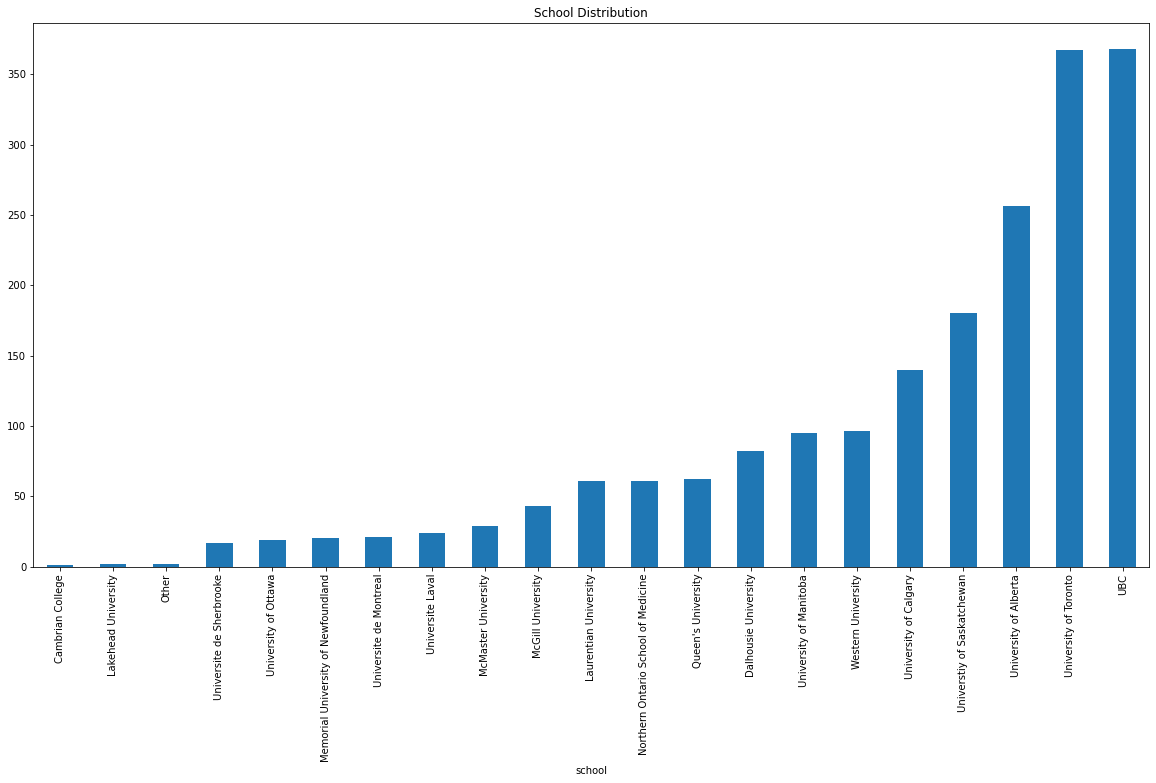

In [22]:
school_plot = pd.crosstab(index=df_val["school"],  
                      columns="count")
school_plot = school_plot.sort_values("count")
school_plot = school_plot.plot(kind="bar",figsize=(20,10),legend=False)
school_plot.set_title("School Distribution")



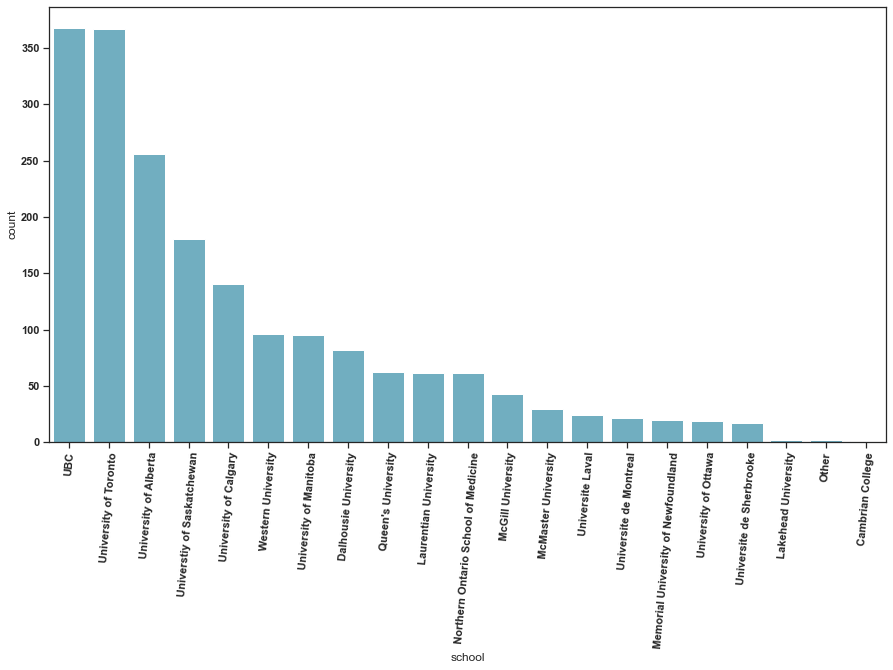

In [491]:
plt.figure(figsize=(15,8))

sns.countplot(x = 'school',
              data = df_val,
              color="c",
              order = df_val['school'].value_counts().index)
plt.xticks(rotation=85)

plt.show()

## Gender

In [23]:
#check number of participants by gender 
df_val.gender.value_counts()

Female    1224
Male       716
Other        6
Name: gender, dtype: int64

In [24]:
print("# of female respondents:",len(df_val.loc[df_val['gender'] == "Female"]))
print("% of female respondents",len(df_val.loc[df_val['gender'] == "Female"])/(len(df_val))*100)
print("# of male respondents:",len(df_val.loc[df_val['gender'] == "Male"]))
print("% of male respondents:",len(df_val.loc[df_val['gender'] == "Male"])/len(df_val)*100)
print("# of non-binary respondents:",len(df_val.loc[df_val['gender'] == "Other"]))
print("% of non-binary respondents:",len(df_val.loc[df_val['gender'] == "Other"])/len(df_val)*100)


# of female respondents: 1224
% of female respondents 62.89825282631038
# of male respondents: 716
% of male respondents: 36.793422404933196
# of non-binary respondents: 6
% of non-binary respondents: 0.3083247687564234


Text(0.5, 1.0, 'Gender Distribution')

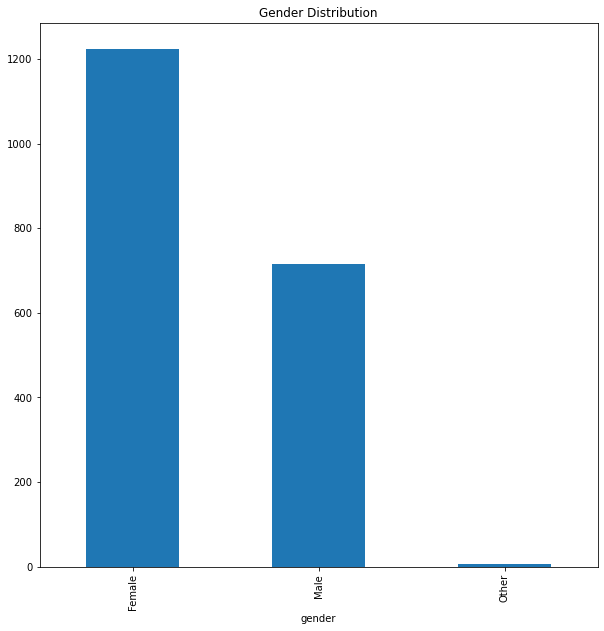

In [25]:
gender_plot = pd.crosstab(index=df_val["gender"],  
                      columns="count")
gender_plot = gender_plot.plot(kind="bar",figsize=(10,10),legend=False)
gender_plot.set_title("Gender Distribution")



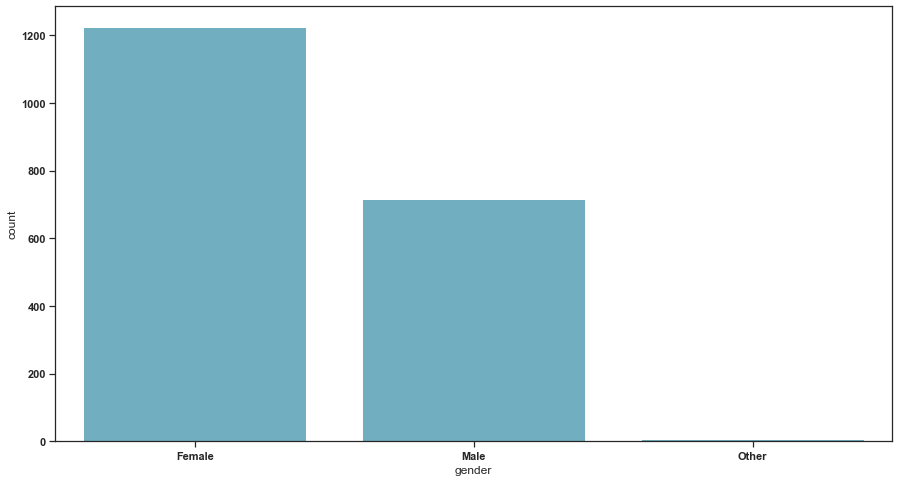

In [511]:
plt.figure(figsize=(15,8))

sns.countplot(x = 'gender',
              data = df_val,
              color="c",
              order = df_val['gender'].value_counts().index)
#plt.xticks(rotation=85)

plt.show()

In [27]:
female = df_val.loc[df_val['gender'] == "Female"]
male = df_val.loc[df_val['gender'] == "Male"]
fem_percep = female['AI_percep']
male_percep = male['AI_percep']

## Program

In [274]:
#check number of participants by program
#manually added new categories in csv
df_val.program.value_counts()

MD                            595
Nursing                       473
Occupational Therapy          240
Physical Therapy              163
Pharmacy                      148
Speech Language Pathology     136
Dentistry                      69
Social work                    39
Genetics counselling           34
Midwifery                      22
Audiology                      15
Medical Laboratory Science     10
Kinesiology                     2
Name: program, dtype: int64

In [275]:
font = {'family' : 'normal',
        'weight' : 'bold',
        'size'   : 12}
plt.rc('font', **font)


Text(0.5, 1.0, '')

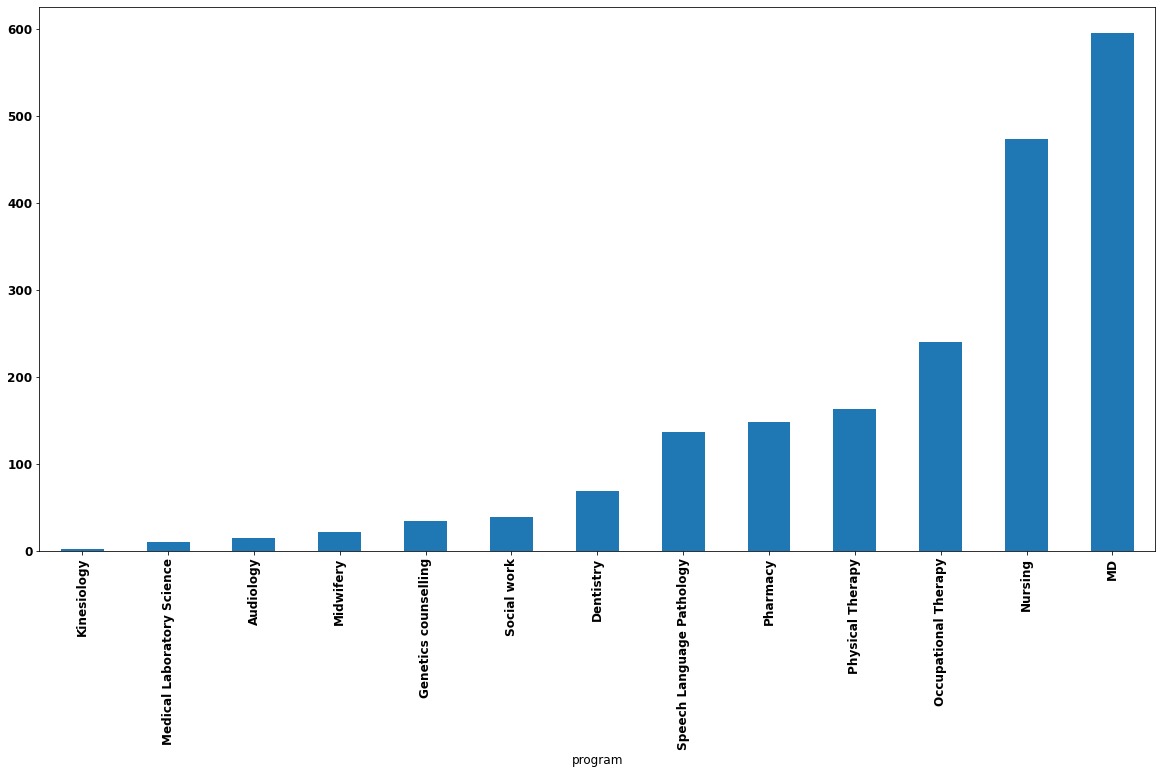

In [276]:
prog_plot = pd.crosstab(index=df_val["program"],  
                      columns="count")
prog_plot = prog_plot.sort_values("count")
prog_plot = prog_plot.plot(kind="bar",figsize=(20,10),legend=False)
prog_plot.set_title("")

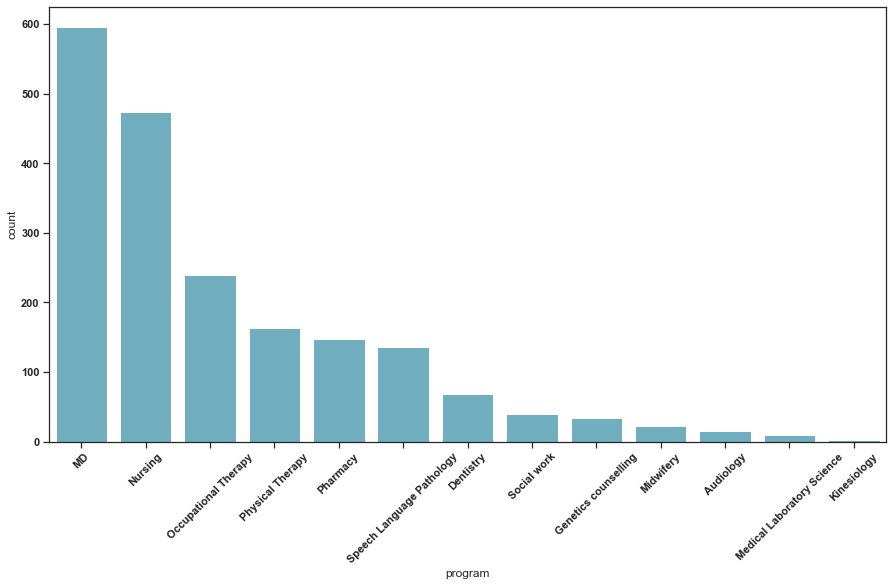

In [485]:
plt.figure(figsize=(15,8))

sns.countplot(x = 'program',
              data = df_val,
              color="c",
              order = df_val['program'].value_counts().index)
plt.xticks(rotation=45)

plt.show()

In [475]:
df_val.sort_values(by='program', ascending=False).index.values

array([ 746, 2015, 2104, ...,  741,  745,  734], dtype=int64)

In [277]:
df_val.program.value_counts().sum()

1946

In [278]:
923/len(df_val)

0.47430626927029806

col_0,percentage
program,
Audiology,0.007708
Dentistry,0.035457
Genetics counselling,0.017472
Kinesiology,0.001028
MD,0.305755
Medical Laboratory Science,0.005139
Midwifery,0.011305
Nursing,0.243063
Occupational Therapy,0.123330


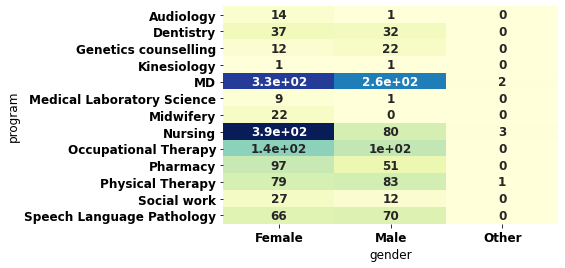

In [279]:
#program representation proportion 
import seaborn as sns
sns.heatmap(pd.crosstab([df_val.program], [df_val.gender]),
            cmap="YlGnBu", annot=True, cbar=False)  
program = pd.crosstab(index=df_val["program"],  
                      columns="percentage",
                      normalize='all')  
#program.columns=["count","rowtotal"]
#program.index=["MD","Audiology","Dentistry","Genetics counselling","Kinesiology","Medical Laboratory Science","Midwifery",
              #"Nursing","Occupational Therapy","Pharmacy","Physical Therapy","Social work",
               #"Speech Language Pathology","coltotal"]
program

<AxesSubplot:xlabel='age', ylabel='program'>

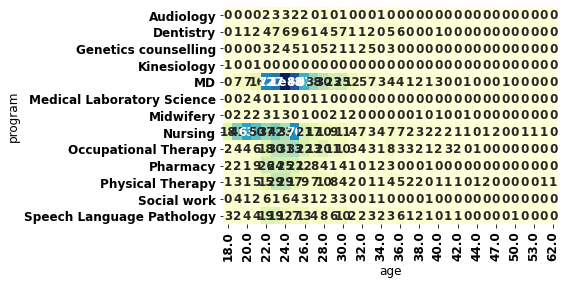

In [280]:
#check number of participants by age and program
program = pd.crosstab(index=df_val['program'],  # Make a crosstab
                     columns=[df_val['age']],
                     margins=True)       
#program['percentage'] = program/program.sum()*100
sns.heatmap(pd.crosstab([df_val.program], [df_val.age]),
            cmap="YlGnBu", annot=True, cbar=False)

In [281]:
#AI perception mean across programs
program_totals = df_val.groupby("program")['AI_percep'].mean()
program_totals

program
Audiology                     7.066667
Dentistry                     7.072464
Genetics counselling          6.147059
Kinesiology                   5.500000
MD                            7.089076
Medical Laboratory Science    6.500000
Midwifery                     4.863636
Nursing                       6.365751
Occupational Therapy          6.291667
Pharmacy                      6.351351
Physical Therapy              6.680982
Social work                   5.076923
Speech Language Pathology     6.272059
Name: AI_percep, dtype: float64

<AxesSubplot:ylabel='program'>

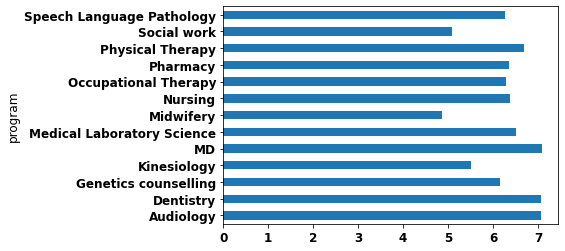

In [282]:
#AI perception mean across programs in bar graph
program_totals.plot(kind="barh", fontsize=12)

<Figure size 1440x720 with 0 Axes>

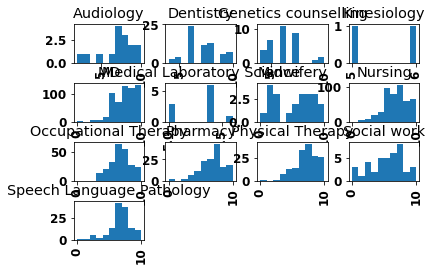

In [283]:
from matplotlib import pyplot
#distribution of AI perception on scale of 0-10 for each program
pyplot.figure(figsize=(20,10))
df_val.hist(column='AI_percep',by='program',);

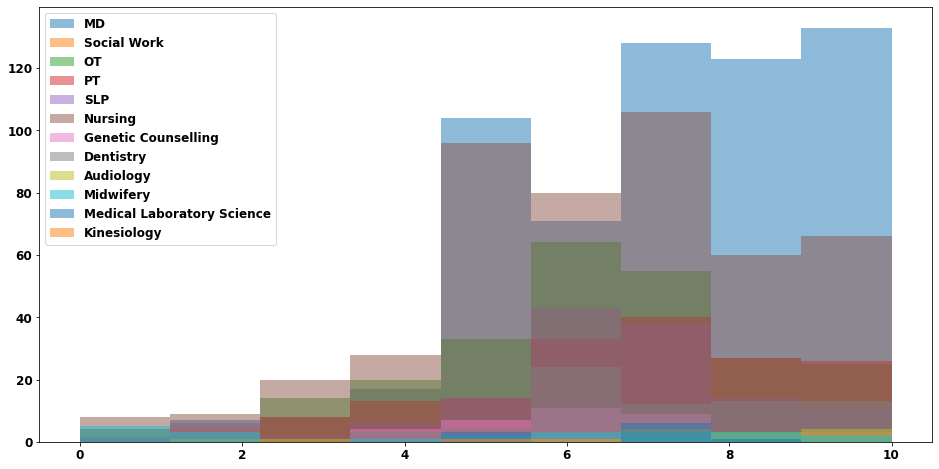

In [284]:
import matplotlib.pyplot as plt
#combined histogram of AI perception across programs 
group_col = 'program'
groups = ['MD','Nursing','Occupational Therapy','Other','Pharmacy',
          'Physical Therapy','Social work','Speech Language Pathology',
          'Genetics counselling','Dentistry','Midwifery','Audiology',
          "Medical Laboratory Science"]

plt.figure(figsize=(16, 8)) 

md = df_val[df_val["program"] == "MD"]["AI_percep"]
sw = df_val[df_val["program"] == "Social work"]["AI_percep"]
ot = df_val[df_val["program"] == "Occupational Therapy"]["AI_percep"]
pt = df_val[df_val["program"] == "Physical Therapy"]["AI_percep"] 
slp = df_val[df_val["program"] == "Speech Language Pathology"]["AI_percep"]
nurs = df_val[df_val["program"] == "Nursing"]["AI_percep"] 
gc = df_val[df_val["program"] == "Genetics counselling"]["AI_percep"]
dent = df_val[df_val["program"] == "Dentistry"]["AI_percep"] 
aud = df_val[df_val["program"] == "Audiology"]["AI_percep"] 
mw = df_val[df_val["program"] == "Midwifery"]["AI_percep"] 
mls = df_val[df_val["program"] == "Medical Laboratory Science"]["AI_percep"] 
kin = df_val[df_val["program"] == "Kinesiology"]["AI_percep"] 

bins = np.linspace(0,10,10)

pyplot.hist(md, bins, alpha=0.5, label='MD')
pyplot.hist(sw, bins, alpha=0.5, label='Social Work')
pyplot.hist(ot, bins, alpha=0.5, label='OT')
pyplot.hist(pt, bins, alpha=0.5, label='PT')
pyplot.hist(slp, bins, alpha=0.5, label='SLP')
pyplot.hist(nurs, bins, alpha=0.5, label='Nursing')
pyplot.hist(gc, bins, alpha=0.5, label='Genetic Counselling')
pyplot.hist(dent, bins, alpha=0.5, label='Dentistry')
pyplot.hist(aud, bins, alpha=0.5, label='Audiology')
pyplot.hist(mw, bins, alpha=0.5, label='Midwifery')
pyplot.hist(mls, bins, alpha=0.5, label='Medical Laboratory Science')
pyplot.hist(kin, bins, alpha=0.5, label='Kinesiology')

#pyplot.figure(figsize=(3, 3))
pyplot.legend(loc='upper left')
pyplot.show()

<AxesSubplot:ylabel='Frequency'>

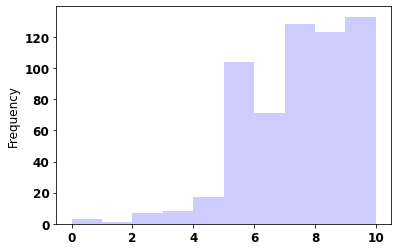

In [285]:
#plot AI perception of one program 
df_val[df_val["program"] == "MD"]["AI_percep"].plot(kind="hist",fc=(0, 0, 1, 0.2))


In [286]:
#Program participants across Schools
program = pd.crosstab(index=df_val['program'],  # Make a crosstab
                     columns=[df_val['school']],
                     margins=True)       
#program['percentage'] = program/program.sum()*100
program

school,Cambrian College,Dalhousie University,Lakehead University,Laurentian University,McGill University,McMaster University,Memorial University of Newfoundland,Northern Ontario School of Medicine,Other,Queen's University,...,Universite de Montreal,Universite de Sherbrooke,University of Alberta,University of Calgary,University of Manitoba,University of Ottawa,University of Toronto,Universtiy of Saskatchewan,Western University,All
program,,,,,,,,,,,,,,,,,,,,,
Audiology,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,14,15
Dentistry,0,1,0,0,0,3,1,7,0,1,...,1,1,5,5,8,0,20,3,0,69
Genetics counselling,0,3,0,0,2,2,0,0,0,1,...,1,0,3,5,3,0,5,3,0,34
Kinesiology,0,0,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2
MD,0,38,0,0,11,5,3,24,0,46,...,0,0,47,28,4,5,118,7,35,595
Medical Laboratory Science,0,0,0,0,0,0,0,0,0,0,...,0,0,10,0,0,0,0,0,0,10
Midwifery,0,0,0,20,0,0,0,2,0,0,...,0,0,0,0,0,0,0,0,0,22
Nursing,1,2,1,40,5,4,1,4,0,5,...,2,2,131,33,13,3,74,117,0,473
Occupational Therapy,0,4,0,0,8,4,5,7,1,3,...,4,6,30,10,23,2,35,11,27,240


## Age
What is the average age of participants?

In [287]:
(205+236+264+257)/len(df_val)

0.4943473792394656

In [288]:
#age counts
df_val.groupby("age").count()

,Progress,UserLanguage,school,school_text,program,program_text,year_level,year_level_text,gender,gender_text,...,Q11_0_6_RANK,Q11_0_8_RANK,Q11_0_7_RANK,AI_ed_text,AI_impact_time,AI_curric,AI_curric_text,AI_ed_form,AI_ed_form_text,age_group
age,,,,,,,,,,,,,,,,,,,,,
18.0,27,27,27,5,27,1,27,0,27,0,...,5,14,0,1,27,27,2,27,0,27
19.0,66,66,66,7,66,2,66,0,66,0,...,18,40,0,0,66,66,3,66,0,66
20.0,86,86,86,14,86,4,86,0,86,1,...,10,63,0,0,86,86,5,86,0,86
21.0,101,101,101,14,101,7,99,0,101,0,...,24,58,0,0,101,101,3,101,2,101
22.0,205,205,205,7,205,5,204,1,205,1,...,44,96,0,0,205,205,6,205,2,205
23.0,236,236,236,3,236,6,225,2,236,0,...,45,123,1,2,236,236,10,236,1,236
24.0,264,264,264,4,264,7,247,1,264,1,...,57,143,0,2,264,264,5,264,1,264
25.0,257,257,257,1,257,2,238,0,257,0,...,38,103,1,2,257,257,11,257,2,257
26.0,147,147,147,1,147,4,133,1,147,0,...,41,65,0,0,147,147,5,147,2,147


In [289]:
#mean age
df_val["age"].describe()

count    1946.000000
mean       25.505139
std         4.904877
min        18.000000
25%        23.000000
50%        24.000000
75%        27.000000
max        62.000000
Name: age, dtype: float64

In [580]:
#median age
df_val.agg(
    {
        "age": ["min", "max", "median", "skew"]
    })

,age
min,18.000000
max,62.000000
median,24.000000
skew,1.821174


In [291]:
#What is the average age for male versus female participants?
df_val[["gender", "age"]].groupby("gender").mean()

,age
gender,
Female,25.195261
Male,26.069832
Other,21.333333


In [292]:
#gender and responses 
df_val.groupby("gender").mean()

,Progress,age,AI_percep,AI_impact_Likert,AI_ed_Likert,AI_ethics_Likert,AI_hope_Likert,AI_worry_Likert,AI_mgmt_Likert,Q11_0_1_RANK,Q11_0_2_RANK,Q11_0_3_RANK,Q11_0_4_RANK,Q11_0_5_RANK,Q11_0_6_RANK,Q11_0_8_RANK,Q11_0_7_RANK
gender,,,,,,,,,,,,,,,,,
Female,100,25.195261,6.503268,7.085784,6.540033,5.529412,6.024510,5.999183,7.849673,1.726474,1.925754,2.053140,1.992260,2.082126,2.145374,2.053019,1.666667
Male,100,26.069832,6.722067,6.706704,6.347765,5.898045,6.410615,5.921788,6.937151,1.714286,1.673611,1.889241,1.929577,2.152632,2.078261,2.092827,1.000000
Other,100,21.333333,5.333333,6.833333,4.666667,5.666667,5.000000,6.000000,8.333333,2.000000,1.500000,2.000000,1.333333,2.000000,3.000000,2.000000,NaN


In [293]:
#mean AI perceptions grouped by gender and age 
df_val.groupby(["age", "gender"])["AI_percep"].mean()


age   gender
18.0  Female     5.421053
      Male       5.125000
19.0  Female     6.136364
      Male       5.857143
      Other      4.000000
                  ...    
50.0  Male       6.000000
51.0  Female     9.000000
53.0  Female     6.000000
56.0  Female     9.000000
62.0  Female    10.000000
Name: AI_percep, Length: 67, dtype: float64

<AxesSubplot:ylabel='Frequency'>

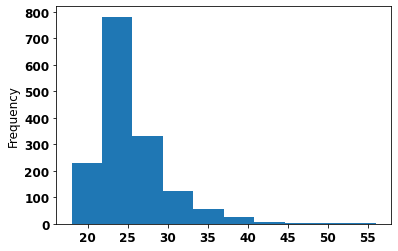

In [294]:
#check age distribution 
age_dist = df["age"]
age_dist.plot(kind="hist")

In [295]:
#Higher Dimensional Tables
gender_program_ai = pd.crosstab(index=df_val["AI_percep"], 
                             columns=[df_val["age"],
                                      df_val["gender"]],
                             margins=True)   # Include row and column totals

gender_program_ai

age         18.0        19.0              20.0              21.0       ...  \
gender    Female Male Female Male Other Female Male Other Female Male  ...   
AI_percep                                                              ...   
0.0            0    0      2    0     0      1    0     1      0    1  ...   
1.0            1    0      2    0     0      0    0     0      0    0  ...   
2.0            1    0      0    1     0      5    0     0      4    0  ...   
3.0            2    0      2    0     0      3    1     0      8    0  ...   
4.0            2    2      4    4     1      2    1     0     10    1  ...   
5.0            3    4      2    3     0     11    2     0     11    1  ...   
6.0            3    1      7    4     0     15    1     0     10    4  ...   
7.0            4    1     13    7     0     15    3     0     17    6  ...   
8.0            2    0      7    1     0     10    2     1      6    2  ...   
9.0            1    0      3    1     0      4    3     0      4    2  ...   
10.0           0    0      2    0     0      4    1     0      9    5  ...   
All           19    8     44   21     1     70   14     2     79   22  ...   

age         45.0        47.0   49.0 50.0   51.0   53.0   56.0   62.0   All  
gender    Female Male Female Female Male Female Female Female Female        
AI_percep                                                                   
0.0            0    0      0      0    0      0      0      0      0    14  
1.0            0    0      0      0    0      0      0      0      0    13  
2.0            0    0      0      0    0      0      0      0      0    34  
3.0            0    0      0      0    0      0      0      0      0    62  
4.0            0    0      0      0    0      0      0      0      0   109  
5.0            0    1      0      0    0      0      0      0      0   307  
6.0            1    0      0      0    1      0      1      0      0   362  
7.0            0    0      0      0    0      0      0      0      0   452  
8.0            0    0      2      1    0      0      0      1      0   289  
9.0            0    0      0      0    0      1      0      0      0   121  
10.0           1    0      0      0    0      0      0      1      1   183  
All            2    1      2      1    1      1      1      2      1  1946  

[12 rows x 68 columns]

## Professional Interest
1=research, 2=business/entrepreneurship, 3=clinical work only 

In [296]:
#load csv file with professional interest encoded in numbers 

df = pd.read_csv("C:/Users/melxt/Git/AI_survey_/Data/20210512_num.csv", skiprows = lambda x: x in [1, 2])
df_num = pd.read_csv("C:/Users/melxt/Git/AI_survey_/Data/20210512_num.csv", skiprows = lambda x: x in [1, 2])

In [297]:
df.columns

Index(['StartDate', 'EndDate', 'Status', 'IPAddress', 'Progress',
       'Duration (in seconds)', 'Finished', 'RecordedDate', 'ResponseId',
       'RecipientLastName', 'RecipientFirstName', 'RecipientEmail',
       'ExternalReference', 'LocationLatitude', 'LocationLongitude',
       'DistributionChannel', 'UserLanguage', 'Q1', 'Q1_18_TEXT', 'Q2',
       'Q2_18_TEXT', 'Q19', 'Q19_5_TEXT', 'Q3', 'Q4', 'Q4_6_TEXT', 'Q5',
       'Q5_8_TEXT', 'Q6', 'Q7', 'Q8_2', 'Q9_2', 'Q9_5', 'Q9_7', 'Q9_9',
       'Q9_10', 'Q9_11', 'Q10', 'Q11_0_GROUP', 'Q11_0_1_RANK', 'Q11_0_2_RANK',
       'Q11_0_3_RANK', 'Q11_0_4_RANK', 'Q11_0_5_RANK', 'Q11_0_6_RANK',
       'Q11_0_8_RANK', 'Q11_0_7_RANK', 'Recoded1', 'Recoded2', 'Recoded3',
       'Recoded4', 'Recoded5', 'Recoded6', 'Recoded7', 'Recoded8',
       'Q11_7_TEXT', 'Q12', 'Q13', 'Q13_3_TEXT', 'Q14', 'Q14_15_TEXT', 'Q15',
       'Q16', 'Q16 - Parent Topics', 'Q16 - Sentiment Polarity',
       'Q16 - Sentiment Score', 'Q16 - Sentiment',
       'Q16 - Topic 

In [298]:
#rename columns 
df = df.rename(columns = { "Q1": "school", 'Q1_18_TEXT': 'school_text', 'Q2':'program',
        'Q2_18_TEXT':'program_text', 'Q19':'year_level', 'Q19_5_TEXT':'year_level_text','Q3':'age',
        'Q4':'gender', 'Q4_6_TEXT':'gender_text', 'Q5':'highest_ed',
        'Q5_8_TEXT':'highest ed_text', 'Q6':'professional_interest','Q8_2':'AI_percep', 'Q9_2':'AI_impact_Likert', 
        'Q9_5':'AI_ed_Likert', 'Q9_7':'AI_ethics_Likert', 'Q9_9':'AI_hope_Likert',
        'Q9_10':'AI_worry_Likert', 'Q9_11':'AI_mgmt_Likert', 'Q11_0_GROUP':'AI_ed_obj', 
        'Q11_7_TEXT':'AI_ed_text', 'Q12':'AI_impact_time', 'Q13':'AI_curric',
        'Q13_3_TEXT':'AI_curric_text', 'Q14':'AI_ed_form', 'Q14_15_TEXT':'AI_ed_form_text'})

In [299]:
df['Recoded1']

0      NaN
1      NaN
2      NaN
3      NaN
4      NaN
        ..
2080   NaN
2081   NaN
2082   NaN
2083   NaN
2084   NaN
Name: Recoded1, Length: 2085, dtype: float64

In [300]:

#filter out data without 100% completion rate, age<=0, have not specified program
df = df.loc[(df['Progress'] == 100), ['Progress', 'UserLanguage', 'school', 'school_text', 'program',
       'program_text', 'year_level', 'year_level_text', 'age', 'gender',
       'gender_text', 'highest_ed', 'highest ed_text', 'professional_interest',
       'Q7', 'AI_percep', 'AI_impact_Likert', 'AI_ed_Likert',
       'AI_ethics_Likert', 'AI_hope_Likert', 'AI_worry_Likert',
       'AI_mgmt_Likert', 'Q10', 'AI_ed_obj', 'Q11_0_1_RANK', 'Q11_0_2_RANK',
       'Q11_0_3_RANK', 'Q11_0_4_RANK', 'Q11_0_5_RANK', 'Q11_0_6_RANK',
       'Q11_0_8_RANK', 'Q11_0_7_RANK', 'AI_ed_text', 'AI_impact_time',
       'AI_curric', 'AI_curric_text', 'AI_ed_form', 'AI_ed_form_text']]
df  = df.loc[(df['age'] > 0), ['Progress', 'UserLanguage', 'school', 'school_text', 'program',
       'program_text', 'year_level', 'year_level_text', 'age', 'gender',
       'gender_text', 'highest_ed', 'highest ed_text', 'professional_interest',
       'Q7', 'AI_percep', 'AI_impact_Likert', 'AI_ed_Likert',
       'AI_ethics_Likert', 'AI_hope_Likert', 'AI_worry_Likert',
       'AI_mgmt_Likert', 'Q10', 'AI_ed_obj', 'Q11_0_1_RANK', 'Q11_0_2_RANK',
       'Q11_0_3_RANK', 'Q11_0_4_RANK', 'Q11_0_5_RANK', 'Q11_0_6_RANK',
       'Q11_0_8_RANK', 'Q11_0_7_RANK', 'AI_ed_text', 'AI_impact_time',
       'AI_curric', 'AI_curric_text', 'AI_ed_form', 'AI_ed_form_text']]
df = df.loc[(df['program'] != "Other"), ['Progress', 'UserLanguage', 'school', 'school_text', 'program',
       'program_text', 'year_level', 'year_level_text', 'age', 'gender',
       'gender_text', 'highest_ed', 'highest ed_text', 'professional_interest',
       'Q7', 'AI_percep', 'AI_impact_Likert', 'AI_ed_Likert',
       'AI_ethics_Likert', 'AI_hope_Likert', 'AI_worry_Likert',
       'AI_mgmt_Likert', 'Q10', 'AI_ed_obj', 'Q11_0_1_RANK', 'Q11_0_2_RANK',
       'Q11_0_3_RANK', 'Q11_0_4_RANK', 'Q11_0_5_RANK', 'Q11_0_6_RANK',
       'Q11_0_8_RANK', 'Q11_0_7_RANK', 'AI_ed_text', 'AI_impact_time',
       'AI_curric', 'AI_curric_text', 'AI_ed_form', 'AI_ed_form_text']]
print(len(df))

1556


In [301]:
df.columns

Index(['Progress', 'UserLanguage', 'school', 'school_text', 'program',
       'program_text', 'year_level', 'year_level_text', 'age', 'gender',
       'gender_text', 'highest_ed', 'highest ed_text', 'professional_interest',
       'Q7', 'AI_percep', 'AI_impact_Likert', 'AI_ed_Likert',
       'AI_ethics_Likert', 'AI_hope_Likert', 'AI_worry_Likert',
       'AI_mgmt_Likert', 'Q10', 'AI_ed_obj', 'Q11_0_1_RANK', 'Q11_0_2_RANK',
       'Q11_0_3_RANK', 'Q11_0_4_RANK', 'Q11_0_5_RANK', 'Q11_0_6_RANK',
       'Q11_0_8_RANK', 'Q11_0_7_RANK', 'AI_ed_text', 'AI_impact_time',
       'AI_curric', 'AI_curric_text', 'AI_ed_form', 'AI_ed_form_text'],
      dtype='object')

In [302]:
prof_int = pd.crosstab(index=df['professional_interest'],  
                     columns='count',
                     margins=True)       
prof_int

col_0,count,All
professional_interest,,
1,465,465
"1,2",175,175
"1,2,3",40,40
"1,3",75,75
2,303,303
"2,3",101,101
3,397,397
All,1556,1556


In [303]:
print("# interested in research:",len(df_num.loc[df_num['Q6'] == "1"]))
print("% interested in research:",len(df_num.loc[df_num['Q6'] == "1"])/(len(df_val))*100)
print("# interested in business/entrepreneurship:",len(df_num.loc[df_num['Q6'] == "2"]))
print("% interested in business/entrepreneurship:",len(df_num.loc[df_num['Q6'] == "2"])/(len(df_val))*100)
print("# interested in clinical care only:",len(df_num.loc[df_num['Q6'] == "3"]))
print("% interested in clinical care only:",len(df_num.loc[df_num['Q6'] == "3"])/(len(df_val))*100)


# interested in research: 498
% interested in research: 25.590955806783143
# interested in business/entrepreneurship: 511
% interested in business/entrepreneurship: 26.258992805755394
# interested in clinical care only: 444
% interested in clinical care only: 22.816032887975336


Text(0.5, 1.0, 'Professional Interest')

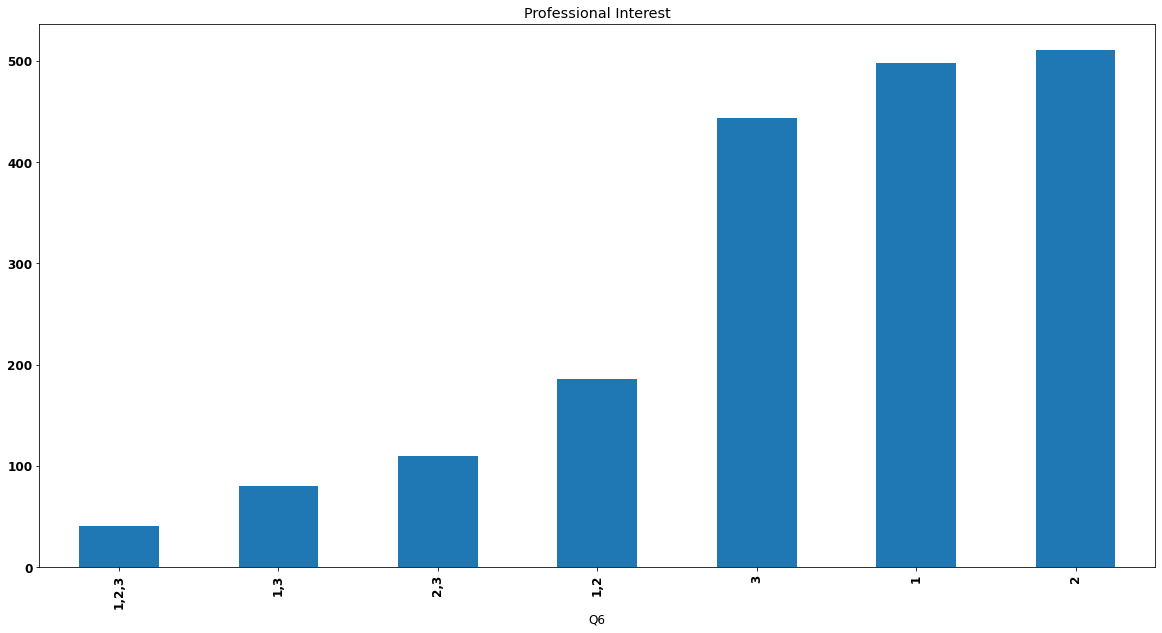

In [304]:
prof_int = pd.crosstab(index=df_num['Q6'],  
                     columns='count')
prof_int_plot = prof_int.sort_values("count")
prof_int_plot = prof_int_plot.plot(kind="bar",figsize=(20,10),legend=False)
prof_int_plot.set_title("Professional Interest")

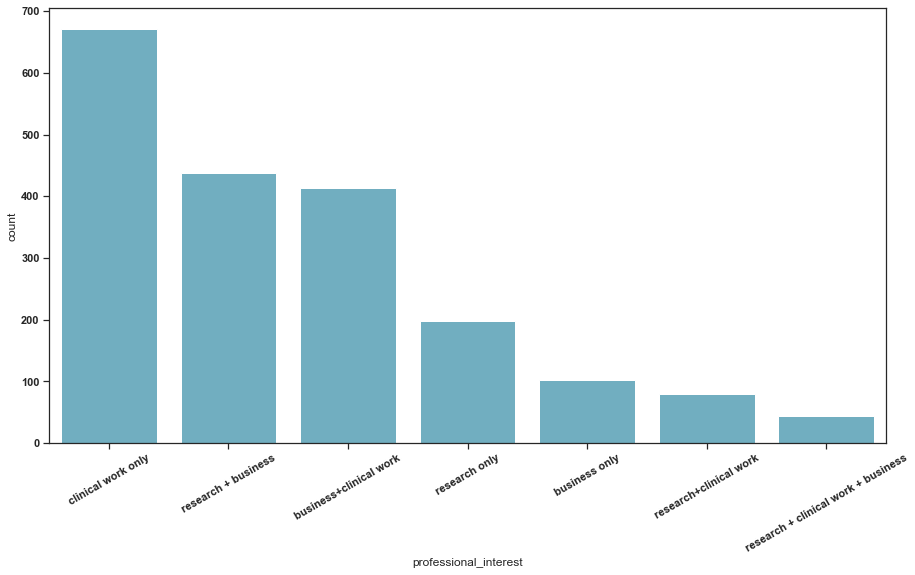

In [499]:
plt.figure(figsize=(15,8))

sns.countplot(x = 'professional_interest',
              data = df_val,
              color="c",
              order = df_val['professional_interest'].value_counts().index)
#plt.xticks(rotation=85)
x1 = [0,1,2,3,4,5,6]
labels = ["clinical work only","research + business",
         "business+clinical work","research only","business only",
         "research+clinical work","research + clinical work + business"]

plt.xticks(x1, labels, rotation=30)

plt.show()

In [305]:
df.groupby(["professional_interest"])["AI_percep"].mean()

professional_interest
1        6.703226
1,2      7.280000
1,2,3    5.950000
1,3      6.840000
2        6.455446
2,3      6.732673
3        6.216625
Name: AI_percep, dtype: float64

## Education Level
4=high school; 5=Bachelors; 6=Masters; 7=PhD; 8=Other; 9=diploma/certificate

In [306]:
#highest degree completed frequencies 
highest_ed = pd.crosstab(index=df_val['highest_ed'],  # Make a crosstab
                     columns='count',
                     margins=True)       
highest_ed

col_0,count,All
highest_ed,,
Bachelor's degree,989,989
Diploma/Certificate,27,27
High school,340,340
Master's degree,423,423
Other,4,4
PhD degree,163,163
All,1946,1946


In [307]:
#mean AI perceptions grouped by education level
df_val.groupby(["highest_ed"])["AI_percep"].mean()

highest_ed
Bachelor's degree      6.639029
Diploma/Certificate    7.629630
High school            6.141176
Master's degree        6.780142
Other                  5.500000
PhD degree             6.472393
Name: AI_percep, dtype: float64

In [308]:
print("# of Bachelor's degree:",len(df_val.loc[df_val['highest_ed'] == "Bachelor's degree"]))
print("% of Bachelor's degree",len(df_val.loc[df_val['highest_ed'] == "Bachelor's degree"])/(len(df_val))*100)
print("# of High school:",len(df_val.loc[df_val['highest_ed'] == "High school"]))
print("% of High school",len(df_val.loc[df_val['highest_ed'] == "High school"])/(len(df_val))*100)
print("# of Master's degree:",len(df_val.loc[df_val['highest_ed'] == "Master's degree"]))
print("% of Master's degree",len(df_val.loc[df_val['highest_ed'] == "Master's degree"])/(len(df_val))*100)
print("# of PhD degree:",len(df_val.loc[df_val['highest_ed'] == "PhD degree"]))
print("% of PhD degree",len(df_val.loc[df_val['highest_ed'] == "PhD degree"])/(len(df_val))*100)
print("# of Diploma/Certificate:",len(df_val.loc[df_val['highest_ed'] == "Diploma/Certificate"]))
print("% of Diploma/Certificate",len(df_val.loc[df_val['highest_ed'] == "Diploma/Certificate"])/(len(df_val))*100)

# of Bachelor's degree: 989
% of Bachelor's degree 50.822199383350465
# of High school: 340
% of High school 17.471736896197328
# of Master's degree: 423
% of Master's degree 21.73689619732785
# of PhD degree: 163
% of PhD degree 8.376156217882837
# of Diploma/Certificate: 27
% of Diploma/Certificate 1.3874614594039054


Text(0.5, 1.0, 'Highest Degree of Education Completed')

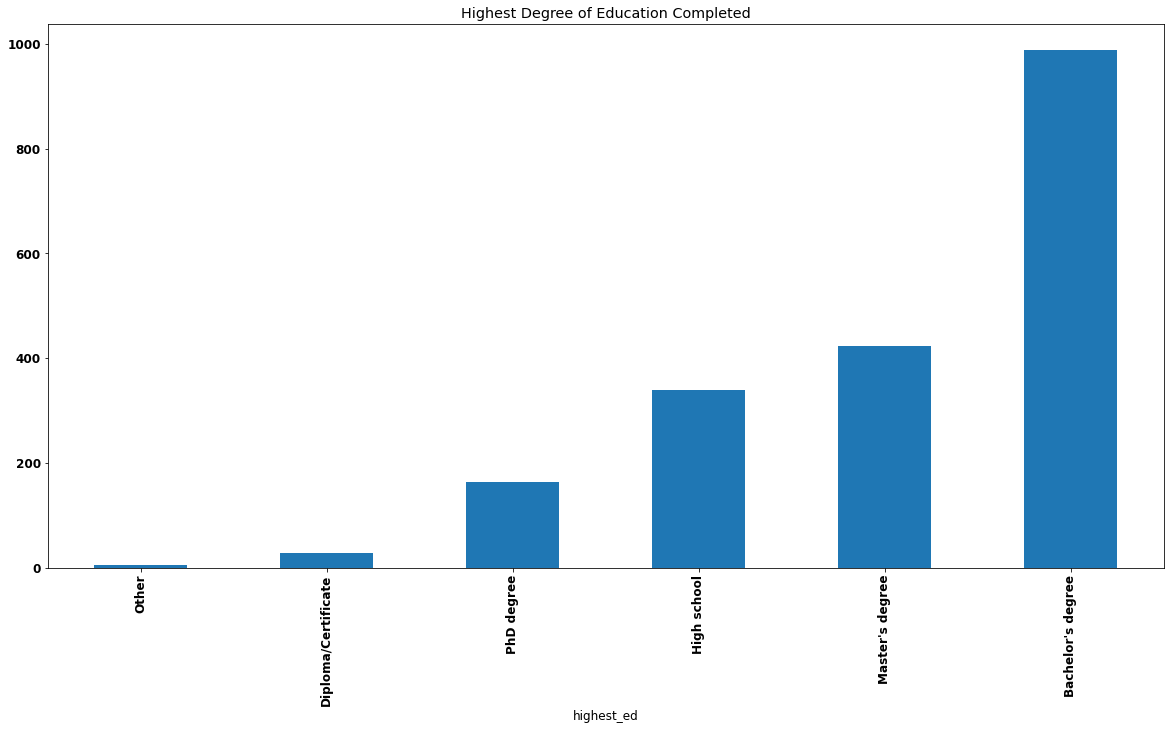

In [309]:
ed_plot = pd.crosstab(index=df_val["highest_ed"],  
                      columns="count")
ed_plot = ed_plot.sort_values("count")
ed_plot = ed_plot.plot(kind="bar",figsize=(20,10),legend=False)
ed_plot.set_title("Highest Degree of Education Completed")

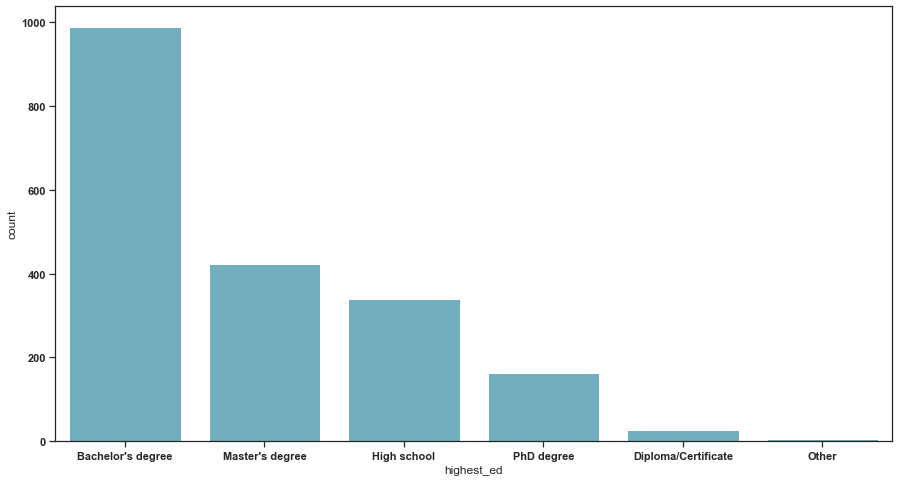

In [495]:
plt.figure(figsize=(15,8))

sns.countplot(x = 'highest_ed',
              data = df_val,
              color="c",
              order = df_val['highest_ed'].value_counts().index)
#plt.xticks(rotation=85)

plt.show()

# Language

In [310]:
df_val.UserLanguage.value_counts()

EN    1934
FR      12
Name: UserLanguage, dtype: int64

In [311]:
#mean AI perceptions grouped by userlanguage 
df_val.groupby(["UserLanguage"])["AI_percep"].mean()

UserLanguage
EN    6.579628
FR    6.666667
Name: AI_percep, dtype: float64

# Perception of AI

## Normality Tests
### Quantile-Quantile Plot
Takes the data sample and by default assume we are comparing it to a Gaussian distribution. Often a line is drawn on the plot to help make this expectation clear. Deviations by the dots from the line shows a deviation from the expected distribution.

In [312]:
#just checking if there are NaN values and if so how many
ai_percep = df_val["AI_percep"]
print(len(ai_percep))
ai_percep_ = [x for x in ai_percep if np.isnan(x) == False]
print(len(ai_percep_)) 

1946
1946


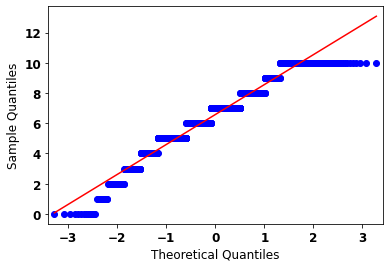

In [313]:
from statsmodels.graphics.gofplots import qqplot
#normality checks
ai_percep = df_val["AI_percep"]
qqplot(ai_percep, line='s')
pyplot.show()

### Shapiro-Wilk Test
evaluates a data sample and quantifies how likely it is that the data was drawn from a Gaussian distribution

In [314]:
from scipy.stats import shapiro
stat, p = shapiro(ai_percep)
print('Statistics=%.3f, p=%.3f' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
	print('Sample looks Gaussian (fail to reject H0)')
else:
	print('Sample does not look Gaussian (reject H0)')

Statistics=0.957, p=0.000
Sample does not look Gaussian (reject H0)


<AxesSubplot:ylabel='Frequency'>

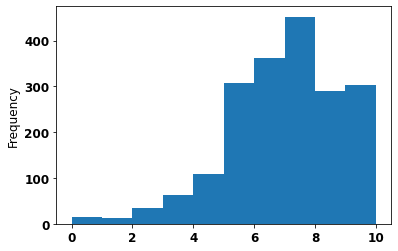

In [315]:
#check histogram
ai_percep = df_val["AI_percep"]
ai_percep.plot(kind="hist")

In [316]:
df_val["AI_percep"].value_counts()

7.0     452
6.0     362
5.0     307
8.0     289
10.0    183
9.0     121
4.0     109
3.0      62
2.0      34
0.0      14
1.0      13
Name: AI_percep, dtype: int64

In [317]:
len(df_val['AI_percep'])

1946

Text(0, 0.5, 'Number')

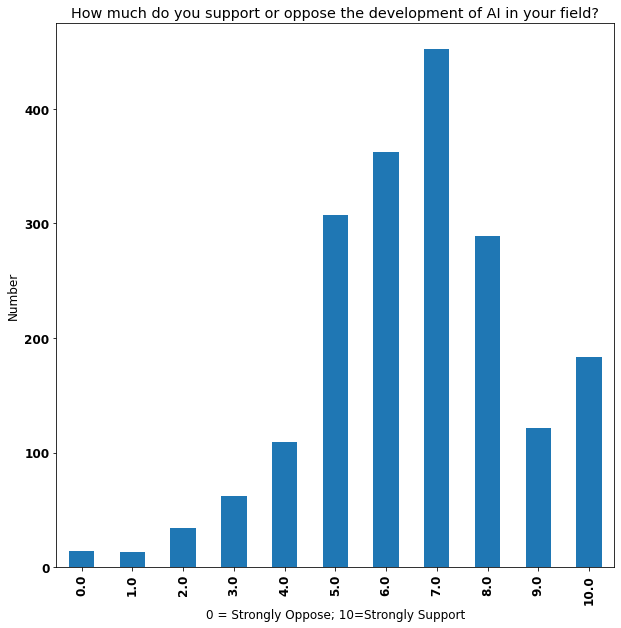

In [318]:
AI_percep_plot = pd.crosstab(index=df_val["AI_percep"],  
                      columns="count")
AI_percep_plot = AI_percep_plot.plot(kind="bar",figsize=(10,10),legend=False)
AI_percep_plot.set_title("How much do you support or oppose the development of AI in your field?")
AI_percep_plot.set_xlabel("0 = Strongly Oppose; 10=Strongly Support")
AI_percep_plot.set_ylabel("Number")

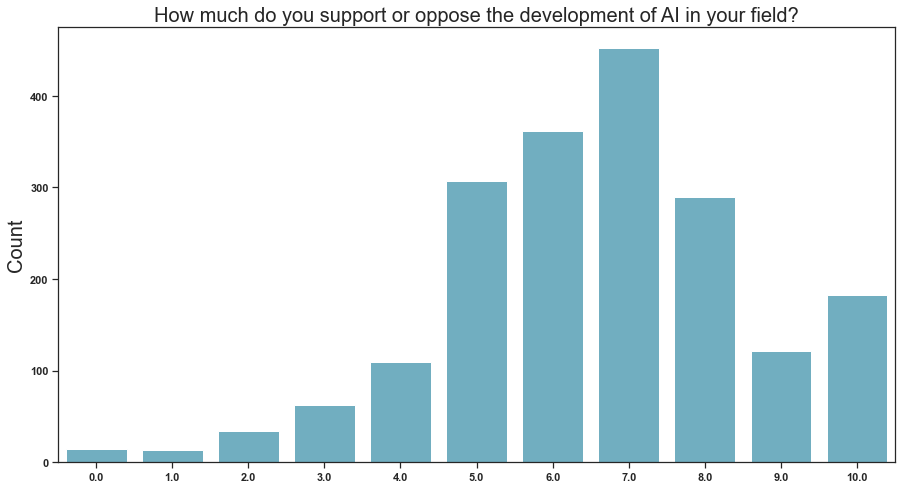

In [527]:
plt.figure(figsize=(15,8))

ax = sns.countplot(x = 'AI_percep',
              data = df_val,
              color="c",)
#plt.xticks(rotation=85)
#x1 = [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20]
#labels = ["Multiple Workshop Series","1- or 2-hour workshop",
#         "1-day course","Graduate-level training","Other",
#         "research+clinical work","research + clinical work + business"]

#plt.xticks(x1, labels, rotation=30)
#plt.xticks(rotation=30)
ax.set_title('How much do you support or oppose the development of AI in your field?',fontsize = 20)
ax.set_ylabel('Count',fontsize = 20)
ax.set_xlabel('',fontsize = 20)
plt.show()

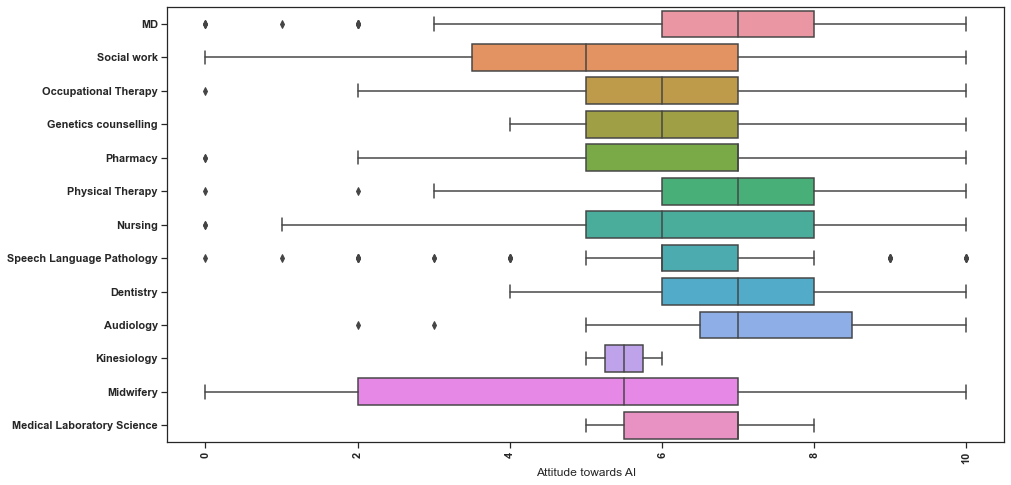

In [554]:
plt.figure(figsize=(15,8))
school_plot = sns.boxplot(x='AI_percep',y='program', data=df_val)
school_plot.set_xlabel("Attitude towards AI")
school_plot.set_ylabel("")
plt.xticks(rotation=90)

plt.show()

## Analysis with group that oppose AI development in field (AI_percep <= 4)

In [319]:
df_val['AI_percep'].value_counts()

7.0     452
6.0     362
5.0     307
8.0     289
10.0    183
9.0     121
4.0     109
3.0      62
2.0      34
0.0      14
1.0      13
Name: AI_percep, dtype: int64

In [320]:
(362+452+289+121+183)/len(df_val['AI_percep'])

0.7230215827338129

In [321]:
#analysis with only groups that oppose AI development in field 
oppose_group = df_val.loc[df_val['AI_percep'] <=4]

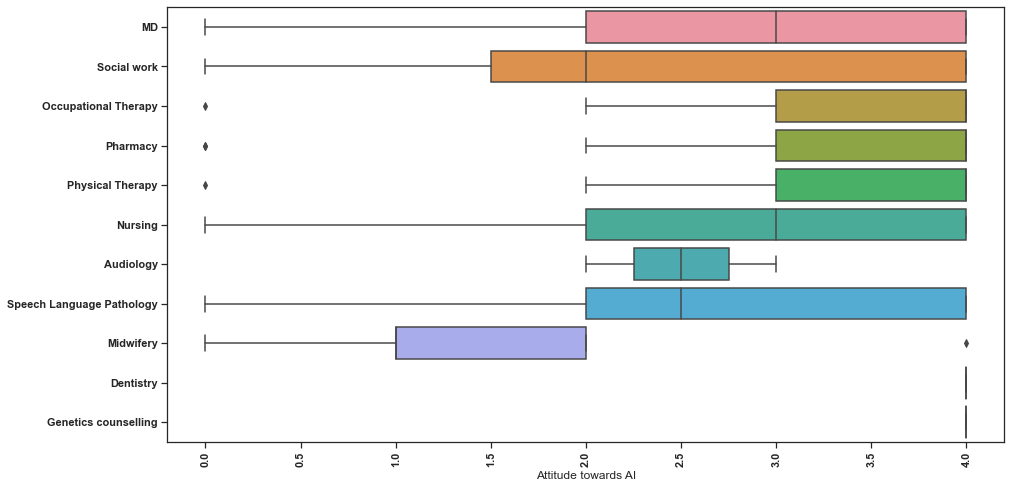

In [555]:
plt.figure(figsize=(15,8))
school_plot = sns.boxplot(x='AI_percep',y='program', data=oppose_group)
school_plot.set_xlabel("Attitude towards AI")
school_plot.set_ylabel("")
plt.xticks(rotation=90)

plt.show()

5.0

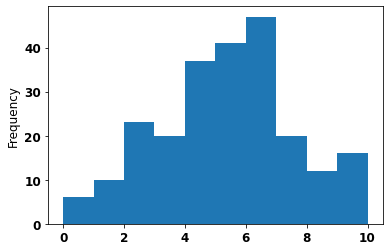

In [322]:
AI_ed_dist_oppose_group = oppose_group["AI_ed_Likert"]
AI_ed_dist_oppose_group.plot(kind="hist")
oppose_group["AI_ed_Likert"].median()

In [323]:
curric_oppose = oppose_group["AI_curric"]
curric_oppose.loc[:].value_counts()


Should be outside of curriculum time       116
Should be part of my program/curriculum    105
Other                                       11
Name: AI_curric, dtype: int64

In [324]:
print(len(oppose_group.loc[oppose_group['AI_curric'] == "Should be outside of curriculum time"])/len(oppose_group))
print(len(oppose_group.loc[oppose_group['AI_curric'] == "Should be part of my program/curriculum"])/len(oppose_group))
print(len(oppose_group.loc[oppose_group['AI_curric'] == "Other"])/len(oppose_group))
print(len(oppose_group)/len(df_val))

0.5
0.4525862068965517
0.04741379310344827
0.11921891058581706


### Perception of AI: Differences among healthcare students / age / gender / level of education / school / professional interest


#### Are there differences in AI perceptions among the students of different programs?

In [325]:
program = pd.crosstab(index=df_val['program'],  # Make a crosstab
                     columns=[df_val['AI_percep']],
                     margins=True) 
program

AI_percep,0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,All
program,,,,,,,,,,,,
Audiology,0,0,1,1,0,1,1,4,3,2,2,15
Dentistry,0,0,0,0,3,4,24,12,13,6,7,69
Genetics counselling,0,0,0,0,4,7,11,9,0,1,2,34
Kinesiology,0,0,0,0,0,1,1,0,0,0,0,2
MD,3,1,7,8,17,104,71,128,123,45,88,595
Medical Laboratory Science,0,0,0,0,0,3,0,6,1,0,0,10
Midwifery,1,4,3,0,1,2,3,3,3,0,2,22
Nursing,2,6,9,20,28,96,80,106,60,27,39,473
Occupational Therapy,1,0,1,14,20,33,64,55,27,14,11,240


In [326]:
#difference between programs and AI perceptions 
import scipy
import scipy.stats as ss
import statsmodels.api as sa
import scikit_posthocs as sp
from scipy import stats
#program_cat = {"MD": int(1),"Audiology":int(2),"Physical Therapy":int(3),"Occupational Therapy":int(4),
                #"Speech Language Pathology":int(5),"Nursing":int(6),"Pharmacy":int(7),"Genetics counselling":int(8),
                #"Dentistry":int(9),"Kinesiology":int(10),"Midwifery":int(11),"Medical Laboratory Science":int(12),
                #"Social work":int(17)}

scipy.stats.kruskal(*[group["AI_percep"].values for name, group in df_val.groupby("program")])


KruskalResult(statistic=88.38514253029909, pvalue=1.0134067801883962e-13)

The results tell us that there is a significant difference between groups means (p = 1.01e-13). To obtain pairwise group differences, I did a posteriori (post hoc) analysis using scikits-posthocs package, specifically Conover’s test.

In [327]:
sp.posthoc_conover(df_val, val_col='AI_percep', group_col='program', p_adjust = 'holm')

,Audiology,Dentistry,Genetics counselling,Kinesiology,MD,Medical Laboratory Science,Midwifery,Nursing,Occupational Therapy,Pharmacy,Physical Therapy,Social work,Speech Language Pathology
Audiology,1.000000,1.000000,1.000000,1.0,1.000000e+00,1.0,0.516667,1.000000e+00,1.000000e+00,1.000000,1.000000,0.128953,1.000000
Dentistry,1.000000,1.000000,0.485529,1.0,1.000000e+00,1.0,0.119917,4.858556e-01,2.197371e-01,1.000000,1.000000,0.002625,0.671293
Genetics counselling,1.000000,0.485529,1.000000,1.0,5.002335e-02,1.0,1.000000,1.000000e+00,1.000000e+00,1.000000,1.000000,1.000000,1.000000
Kinesiology,1.000000,1.000000,1.000000,1.0,1.000000e+00,1.0,1.000000,1.000000e+00,1.000000e+00,1.000000,1.000000,1.000000,1.000000
MD,1.000000,1.000000,0.050023,1.0,1.000000e+00,1.0,0.015132,5.705844e-08,7.932282e-07,0.002628,1.000000,0.000013,0.001102
Medical Laboratory Science,1.000000,1.000000,1.000000,1.0,1.000000e+00,1.0,1.000000,1.000000e+00,1.000000e+00,1.000000,1.000000,1.000000,1.000000
Midwifery,0.516667,0.119917,1.000000,1.0,1.513239e-02,1.0,1.000000,1.000000e+00,1.000000e+00,1.000000,0.485856,1.000000,1.000000
Nursing,1.000000,0.485856,1.000000,1.0,5.705844e-08,1.0,1.000000,1.000000e+00,1.000000e+00,1.000000,1.000000,0.232961,1.000000
Occupational Therapy,1.000000,0.219737,1.000000,1.0,7.932282e-07,1.0,1.000000,1.000000e+00,1.000000e+00,1.000000,1.000000,0.766351,1.000000
Pharmacy,1.000000,1.000000,1.000000,1.0,2.627936e-03,1.0,1.000000,1.000000e+00,1.000000e+00,1.000000,1.000000,0.442901,1.000000


#### Are there differences in AI perceptions among the different age groups?

In [328]:
#differences between age and age perception 
age = pd.crosstab(index=df_val['age'],  # Make a crosstab
                     columns=[df_val['AI_percep']],
                     margins=True) 
age

AI_percep,0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,All
age,,,,,,,,,,,,
18.0,0,1,1,2,4,7,4,5,2,1,0,27
19.0,2,2,1,2,9,5,11,20,8,4,2,66
20.0,2,0,5,4,3,13,16,18,13,7,5,86
21.0,1,0,4,8,11,12,14,23,8,6,14,101
22.0,2,0,2,2,10,43,33,62,28,14,9,205
23.0,1,0,1,13,12,17,43,68,48,12,21,236
24.0,3,2,5,6,13,33,32,72,42,21,35,264
25.0,0,1,2,6,8,74,56,42,37,14,17,257
26.0,2,2,2,2,9,22,31,38,17,12,10,147


In [441]:
#group age then do kruskal-wallis
labs=['<20','20-22','23-25','26-28','29-31','32-34','35-37','38-40','>41']
#labs=['<22','23-27','28-32','33-37','38-42','42-46','47-51','51+']
age_grouped = pd.cut(df_val['age'], bins=9, labels=labs)
age_grouped.value_counts()
age_grouped

0       20-22
1       20-22
2       20-22
3       20-22
4         <20
        ...  
2415    23-25
2416    23-25
2417    20-22
2418    20-22
2419      <20
Name: age, Length: 1946, dtype: category
Categories (9, object): ['<20' < '20-22' < '23-25' < '26-28' ... '32-34' < '35-37' < '38-40' < '>41']

In [442]:
age_grouped.loc[:].value_counts()

20-22    994
<20      485
23-25    291
26-28    118
29-31     41
32-34     10
38-40      3
35-37      3
>41        1
Name: age, dtype: int64

In [443]:
df_val['age_group']=age_grouped

In [500]:
age_group = pd.crosstab(index=df_val['age_group'],  # Make a crosstab
                     columns='count',
                     margins=False) 
len(age_group)
age_group

col_0,count
age_group,
<20,485
20-22,994
23-25,291
26-28,118
29-31,41
32-34,10
35-37,3
38-40,3
>41,1


In [510]:
1/len(df_val['age'])*100

0.051387461459403906

Text(0.5, 1.0, 'Age Distribution')

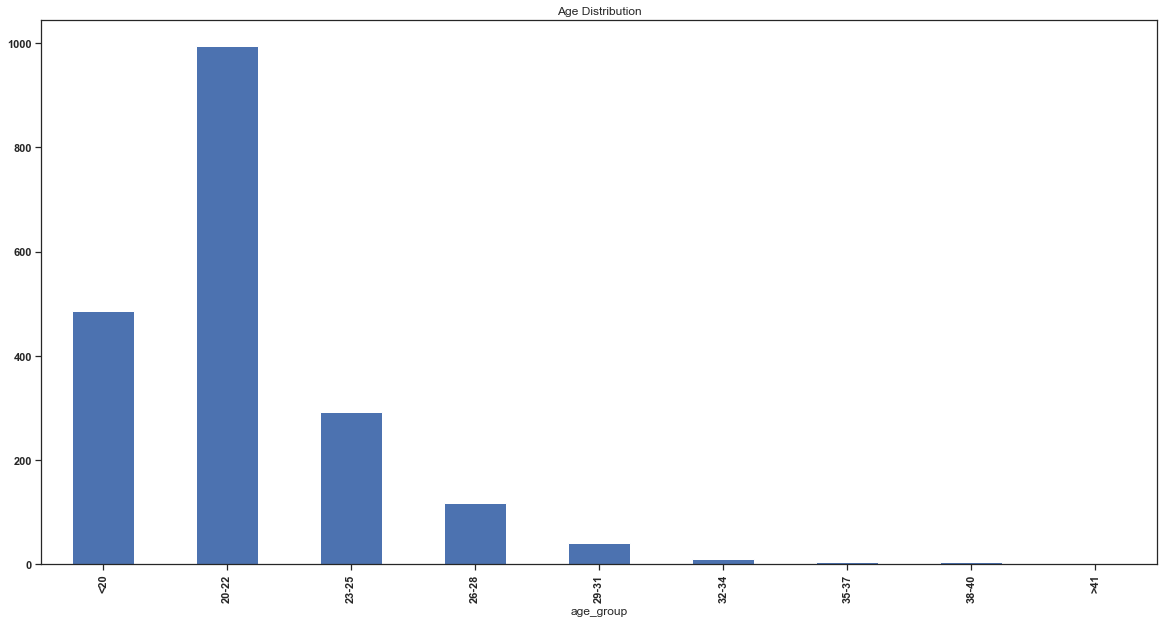

In [453]:
import matplotlib.pyplot as plt

age_plot = age_group.plot(kind="bar",figsize=(20,10),legend=False)
age_plot.set_title("Age Distribution")


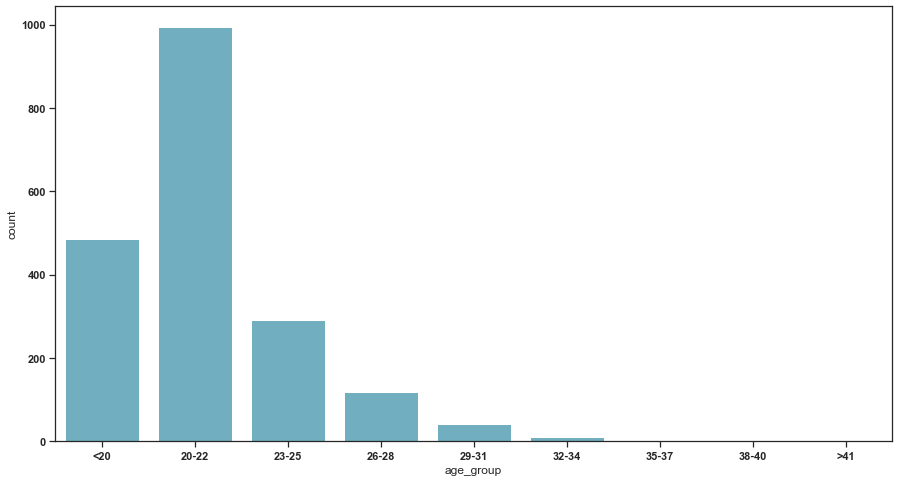

In [494]:
plt.figure(figsize=(15,8))

sns.countplot(x = 'age_group',
              data = df_val,
              color="c")
#plt.xticks(rotation=85)

plt.show()

In [334]:
#difference between age and AI perceptions 
data = [age_grouped.loc[:].values for ids in df_val.groupby('AI_percep')]

scipy.stats.kruskal(*[group["AI_percep"].values for name, group in df_val.groupby("age_group")])


KruskalResult(statistic=12.490090089947813, pvalue=0.08555076884494163)

Text(0, 0.5, 'Attitude towards AI')

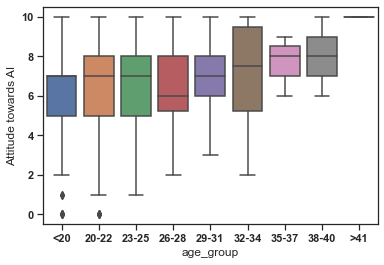

In [534]:
gend_plot = sns.boxplot(x='age_group',y='AI_percep', data=df_val)
gend_plot.set_ylabel("Attitude towards AI")

Text(0, 0.5, 'Attitude towards AI')

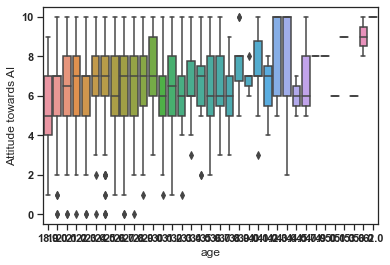

In [434]:
gend_plot = sns.boxplot(x='age',y='AI_percep', data=df_val)
gend_plot.set_ylabel("Attitude towards AI")

#### Are there differences in AI perceptions among the different gender?

In [335]:
scipy.stats.kruskal(*[group["AI_percep"].values for name,group in df_val.groupby("gender")],correction=True)


KruskalResult(statistic=2.1904255625845077, pvalue=0.33446843075148125)

In [336]:
sp.posthoc_conover(df_val, val_col='AI_percep', group_col='gender')

,Female,Male,Other
Female,1.000000,0.224621,0.427682
Male,0.224621,1.000000,0.351777
Other,0.427682,0.351777,1.000000


Text(0, 0.5, 'Attitude towards AI')

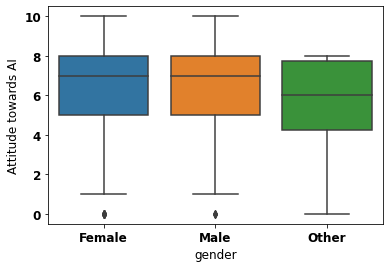

In [337]:
gend_plot = sns.boxplot(x='gender',y='AI_percep', data=df_val)
gend_plot.set_ylabel("Attitude towards AI")

#### Are there differences in AI perceptions among the different school?

In [338]:
scipy.stats.kruskal(*[group["AI_percep"].values for name,group in df_val.groupby("school")])


KruskalResult(statistic=57.30661639576058, pvalue=1.8439552897294257e-05)

In [544]:
school_diff = sp.posthoc_conover(df_val, val_col='AI_percep', group_col='school')
school_diff.to_csv(r'C:\Users\melxt\Desktop\school_diff.csv')  

In [549]:
df_val["school"] = df_val["school"].apply(lambda x: x.replace("UBC", "BC"))

df_val["school"] = df_val["school"].apply(lambda x: x.replace("University of Alberta", "Prairies"))
df_val["school"] = df_val["school"].apply(lambda x: x.replace("University of Calgary", "Prairies"))
df_val["school"] = df_val["school"].apply(lambda x: x.replace("Universtiy of Saskatchewan", "Prairies"))
df_val["school"] = df_val["school"].apply(lambda x: x.replace("University of Manitoba", "Prairies"))

df_val["school"] = df_val["school"].apply(lambda x: x.replace("University of Toronto", "Ontario"))
df_val["school"] = df_val["school"].apply(lambda x: x.replace("University of Ottawa", "Ontario"))
df_val["school"] = df_val["school"].apply(lambda x: x.replace("McMaster University", "Ontario"))
df_val["school"] = df_val["school"].apply(lambda x: x.replace("Western University", "Ontario"))
df_val["school"] = df_val["school"].apply(lambda x: x.replace("Northern Ontario School of Medicine", "Ontario"))
df_val["school"] = df_val["school"].apply(lambda x: x.replace("Lakehead University", "Ontario"))
df_val["school"] = df_val["school"].apply(lambda x: x.replace("Laurentian University", "Ontario"))
df_val["school"] = df_val["school"].apply(lambda x: x.replace("Cambrian College", "Ontario"))
df_val["school"] = df_val["school"].apply(lambda x: x.replace("Queen's University", "Ontario"))

df_val["school"] = df_val["school"].apply(lambda x: x.replace("Memorial University of Newfoundland", "Atlantic Canada"))
df_val["school"] = df_val["school"].apply(lambda x: x.replace("Dalhousie University", "Atlantic Canada"))

df_val["school"] = df_val["school"].apply(lambda x: x.replace("Universite Laval", "Quebec"))
df_val["school"] = df_val["school"].apply(lambda x: x.replace("Universite de Montreal", "Quebec"))
df_val["school"] = df_val["school"].apply(lambda x: x.replace("McGill University", "Quebec"))
df_val["school"] = df_val["school"].apply(lambda x: x.replace("Universite de Sherbrooke", "Atlantic Canada"))


In [550]:
scipy.stats.kruskal(*[group["AI_percep"].values for name,group in df_val.groupby("school")])


KruskalResult(statistic=16.097675454858436, pvalue=0.006570669002212796)

In [553]:
region_diff = sp.posthoc_conover(df_val, val_col='AI_percep', group_col='school')
region_diff.to_csv(r'C:\Users\melxt\Desktop\region_diff.csv')

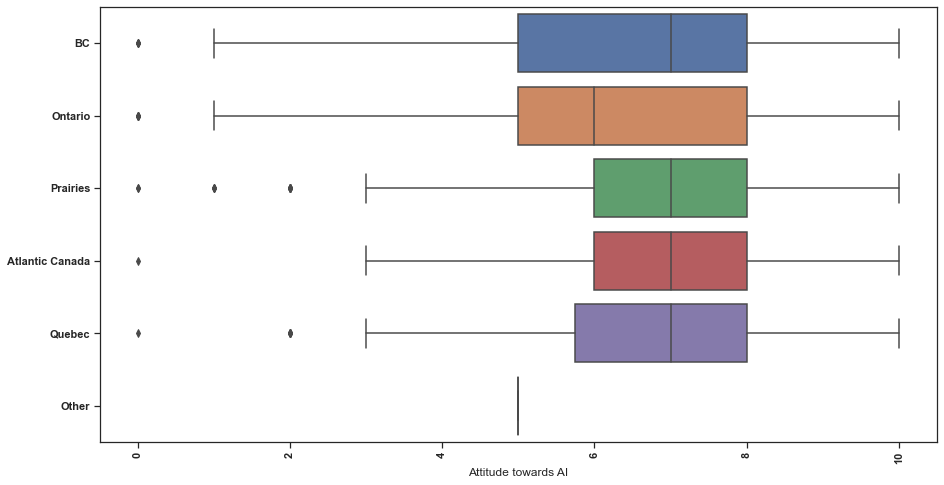

In [552]:
plt.figure(figsize=(15,8))
school_plot = sns.boxplot(x='AI_percep',y='school', data=df_val)
school_plot.set_xlabel("Attitude towards AI")
school_plot.set_ylabel("")
plt.xticks(rotation=90)

plt.show()

#### Are there differences in AI perceptions among year levels?

In [340]:
year_level = df_val['year_level']
year_level_df = df_val[df_val['year_level'].notna()]
year_level_df

,Progress,UserLanguage,school,school_text,program,program_text,year_level,year_level_text,age,gender,...,Q11_0_6_RANK,Q11_0_8_RANK,Q11_0_7_RANK,AI_ed_text,AI_impact_time,AI_curric,AI_curric_text,AI_ed_form,AI_ed_form_text,age_group
0,100,EN,UBC,NaN,MD,NaN,1st year,NaN,23.0,Female,...,NaN,2.0,NaN,NaN,in 5 years,Should be part of my program/curriculum,NaN,1- or 2-hour workshop,NaN,<22
1,100,EN,UBC,NaN,MD,NaN,1st year,NaN,24.0,Male,...,NaN,3.0,NaN,NaN,in 10 years,Should be outside of curriculum time,NaN,1- or 2-hour workshop,NaN,23-27
2,100,EN,UBC,NaN,MD,NaN,1st year,NaN,25.0,Male,...,2.0,1.0,NaN,NaN,in 10 years,Should be part of my program/curriculum,NaN,Multiple workshop series,NaN,23-27
3,100,EN,UBC,NaN,MD,NaN,1st year,NaN,24.0,Female,...,NaN,2.0,NaN,NaN,in 20 years,Should be outside of curriculum time,NaN,1-day course,NaN,23-27
4,100,EN,UBC,NaN,MD,NaN,1st year,NaN,22.0,Female,...,NaN,3.0,NaN,NaN,in 10 years,Should be part of my program/curriculum,NaN,1- or 2-hour workshop,NaN,<22
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2415,100,EN,Northern Ontario School of Medicine,NaN,Occupational Therapy,NaN,2nd year,NaN,30.0,Female,...,3.0,NaN,NaN,NaN,in 5 years,Should be part of my program/curriculum,NaN,1-day course,NaN,28-32
2416,100,EN,Memorial University of Newfoundland,NaN,MD,NaN,2nd year,NaN,30.0,Female,...,3.0,NaN,NaN,NaN,in 5 years,Should be part of my program/curriculum,NaN,Multiple workshop series,NaN,28-32
2417,100,EN,University of Toronto,NaN,Nursing,NaN,2nd year,NaN,23.0,Male,...,NaN,NaN,NaN,NaN,in 5 years,Should be part of my program/curriculum,NaN,"1-day course,Multiple workshop series",NaN,<22
2418,100,EN,Queen's University,NaN,MD,NaN,3rd year,NaN,26.0,Female,...,2.0,3.0,NaN,NaN,in 5 years,Should be outside of curriculum time,NaN,Multiple workshop series,NaN,23-27


In [341]:
scipy.stats.kruskal(*[group["AI_percep"].values for name,group in df_val.groupby("year_level",dropna=True)])


KruskalResult(statistic=17.904210491786337, pvalue=0.0012884425255110426)

In [342]:
sp.posthoc_conover(year_level_df, val_col='AI_percep', group_col='year_level')


,1st year,2nd year,3rd year,4th year,Other
1st year,1.000000,0.001060,0.001753,0.004645,0.008449
2nd year,0.001060,1.000000,0.987608,0.995483,0.104051
3rd year,0.001753,0.987608,1.000000,0.993679,0.106871
4th year,0.004645,0.995483,0.993679,1.000000,0.110292
Other,0.008449,0.104051,0.106871,0.110292,1.000000


Text(0, 0.5, 'Attitude towards AI')

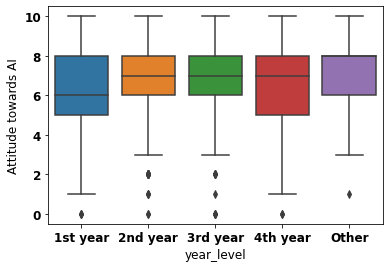

In [343]:
yearlevel_plot = sns.boxplot(x='year_level',y='AI_percep', data=df_val)
yearlevel_plot.set_ylabel("Attitude towards AI")

#### Are there differences in AI perceptions among the different level of education?

In [344]:
scipy.stats.kruskal(*[group["AI_percep"].values for name,group in df_val.groupby("highest_ed")])


KruskalResult(statistic=27.044996556666167, pvalue=5.590298756992337e-05)

In [345]:
df_val.highest_ed.value_counts()

Bachelor's degree      989
Master's degree        423
High school            340
PhD degree             163
Diploma/Certificate     27
Other                    4
Name: highest_ed, dtype: int64

#switch this cell to "Code" if you need to group masters and phd together
#replace Master's & PhD with "Grad" to group together
df_val["highest_ed"] = df_val["highest_ed"].apply(lambda x: x.replace("Master's degree", "Grad"))
df_val["highest_ed"] = df_val["highest_ed"].apply(lambda x: x.replace("PhD degree", "Grad"))

df_val["highest_ed"]  


In [346]:
sp.posthoc_conover(df_val, val_col='AI_percep', group_col='highest_ed')

,Bachelor's degree,Diploma/Certificate,High school,Master's degree,Other,PhD degree
Bachelor's degree,1.000000,0.005410,0.000391,0.432352,0.823472,0.069728
Diploma/Certificate,0.005410,1.000000,0.000130,0.012271,0.221671,0.000816
High school,0.000391,0.000130,1.000000,0.000228,0.824482,0.462979
Master's degree,0.432352,0.012271,0.000228,1.000000,0.754060,0.030981
Other,0.823472,0.221671,0.824482,0.754060,1.000000,0.934465
PhD degree,0.069728,0.000816,0.462979,0.030981,0.934465,1.000000


(array([0, 1, 2, 3, 4, 5]),
 [Text(0, 0, "Bachelor's degree"),
  Text(1, 0, "Master's degree"),
  Text(2, 0, 'High school'),
  Text(3, 0, 'PhD degree'),
  Text(4, 0, 'Diploma/Certificate'),
  Text(5, 0, 'Other')])

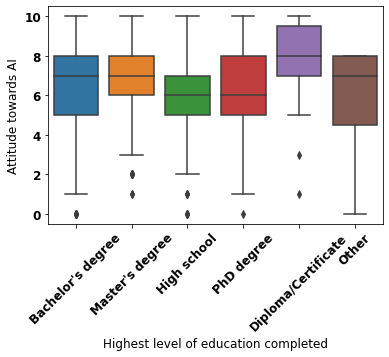

In [347]:
edlevel_plot = sns.boxplot(x='highest_ed',y='AI_percep', data=df_val)
edlevel_plot.set_xlabel("Highest level of education completed",fontsize=12)
edlevel_plot.set_ylabel("Attitude towards AI")
plt.xticks(rotation=45)
#edlevel_plot.set_xticklabels(rotation=30)


#### Are there differences in AI perceptions among the students with different professional interests?

In [348]:
scipy.stats.kruskal(*[group["AI_percep"].values for name,group in df_val.groupby("professional_interest")])


KruskalResult(statistic=48.793853260363036, pvalue=8.198879836697573e-09)

In [431]:
proint_df = sp.posthoc_conover(df_val, val_col='AI_percep', group_col='professional_interest')
proint_df.to_csv(r'C:\Users\melxt\Desktop\proint_anal.csv')  

([<matplotlib.axis.XTick at 0x216cd11f9a0>,
 [Text(0, 0, 'clinical work only'),
  Text(1, 0, 'research + business'),
  Text(2, 0, 'business+clinical work'),
  Text(3, 0, 'research only'),
  Text(4, 0, 'business only'),
  Text(5, 0, 'research+clinical work'),
  Text(6, 0, 'research + clinical work + business')])

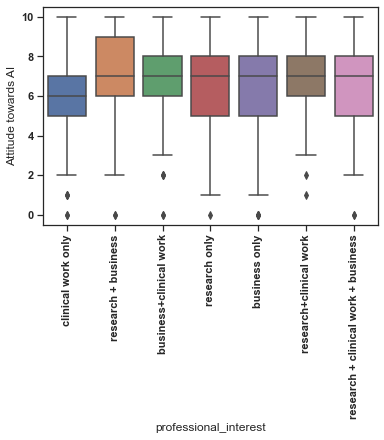

In [497]:
from matplotlib.ticker import FuncFormatter
proin_plot = sns.boxplot(x='professional_interest',y='AI_percep', data=df_val)
proin_plot.set_xlabel("professional_interest",fontsize=12)
proin_plot.set_ylabel("Attitude towards AI")
x1 = [0,1,2,3,4,5,6]
labels = ["clinical work only","research + business",
         "business+clinical work","research only","business only",
         "research+clinical work","research + clinical work + business"]

plt.xticks(x1, labels, rotation=90)

# Healthcare Student Beliefs & Attitudes Towards AI on their Careers
Likert scale responses where 0=completely disagree, 5=neutral, 10=completely agree

<AxesSubplot:ylabel='Frequency'>

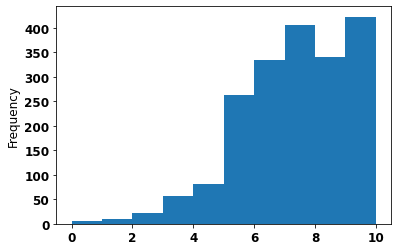

In [350]:
#Likert Scale Responses to Statement:"I believe artificial intelligence will have an impact on my career."
AI_impact_dist = df_val["AI_impact_Likert"]
AI_impact_dist.plot(kind="hist")

In [557]:
scipy.stats.kruskal(*[group["AI_impact_Likert"].values for name,group in df_val.groupby("program")])


KruskalResult(statistic=148.5403469409081, pvalue=1.1209691181228393e-25)

Text(0, 0.5, 'Number')

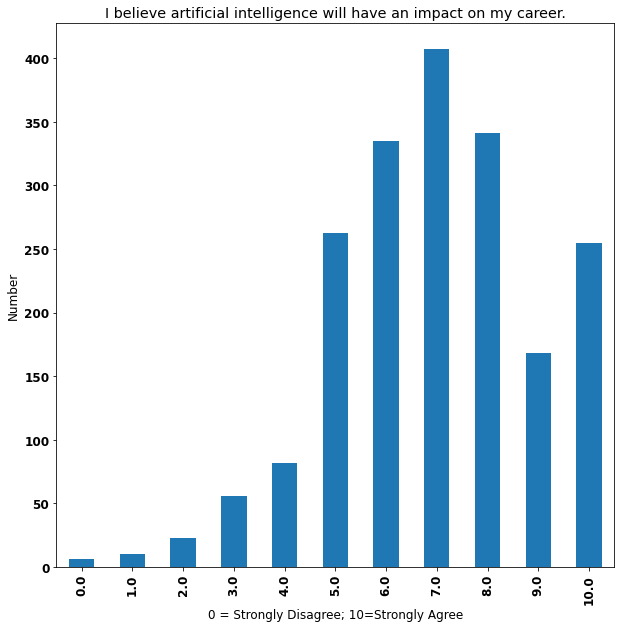

In [352]:
AI_impact_plot = pd.crosstab(index=df_val["AI_impact_Likert"],  
                      columns="count")
AI_impact_plot = AI_impact_plot.plot(kind="bar",figsize=(10,10),legend=False)
AI_impact_plot.set_title("I believe artificial intelligence will have an impact on my career.")
AI_impact_plot.set_xlabel("0 = Strongly Disagree; 10=Strongly Agree")
AI_impact_plot.set_ylabel("Number")

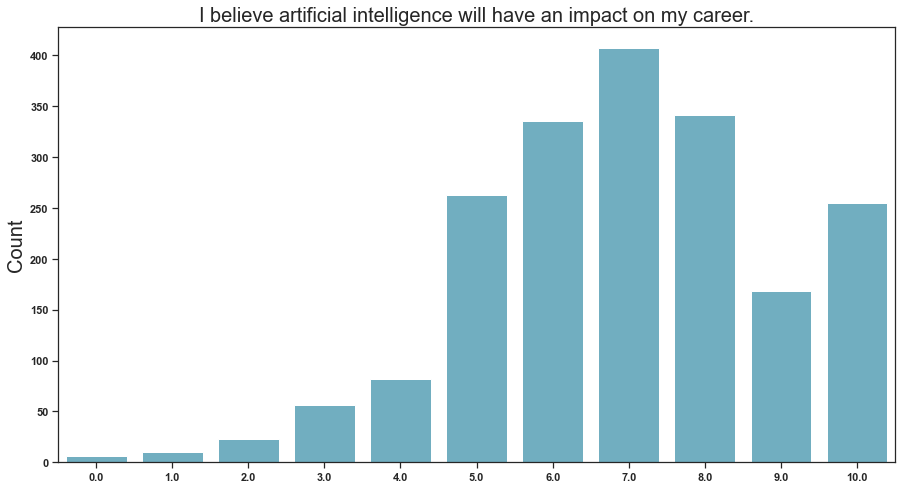

In [528]:
plt.figure(figsize=(15,8))

ax = sns.countplot(x = 'AI_impact_Likert',
              data = df_val,
              color="c",)
#plt.xticks(rotation=85)
#x1 = [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20]
#labels = ["Multiple Workshop Series","1- or 2-hour workshop",
#         "1-day course","Graduate-level training","Other",
#         "research+clinical work","research + clinical work + business"]

#plt.xticks(x1, labels, rotation=30)
#plt.xticks(rotation=30)
ax.set_title('I believe artificial intelligence will have an impact on my career.',fontsize = 20)
ax.set_ylabel('Count',fontsize = 20)
ax.set_xlabel('',fontsize = 20)
plt.show()

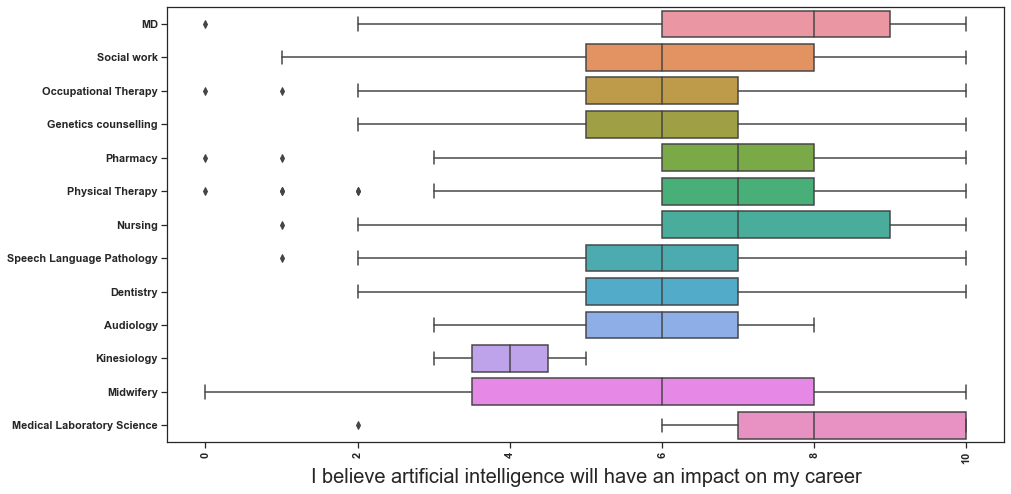

In [572]:
plt.figure(figsize=(15,8))
school_plot = sns.boxplot(x='AI_impact_Likert',y='program', data=df_val)
school_plot.set_xlabel("I believe artificial intelligence will have an impact on my career",fontsize = 20)
school_plot.set_ylabel("")
plt.xticks(rotation=90)

plt.show()

In [353]:
print(len(df_val.loc[df_val['AI_impact_Likert'] >= 6]))
print(len(df_val.loc[df_val['AI_impact_Likert'] >= 6])/len(df_val))


1506
0.7738951695786228


In [573]:
impact_diff = sp.posthoc_conover(df_val, val_col='AI_impact_Likert', group_col='program')
impact_diff.to_csv(r'C:\Users\melxt\Desktop\impact_diff.csv')  

1946

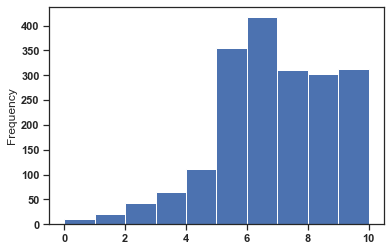

In [570]:
#Likert Scale Responses to Statement:"I believe healthcare students need to learn the basics of AI."
AI_ed_dist = df_val["AI_ed_Likert"]
AI_ed_dist.plot(kind="hist")
len(df_val["AI_ed_Likert"])

In [566]:
scipy.stats.kruskal(*[group["AI_ed_Likert"].values for name,group in df_val.groupby("program")])


KruskalResult(statistic=21.54670806864264, pvalue=0.04292551718517852)

In [568]:
AI_ed_Likert_diff = sp.posthoc_conover(df_val, val_col='AI_ed_Likert', group_col='program')
AI_ed_Likert_diff.to_csv(r'C:\Users\melxt\Desktop\AI_ed_Likert_diff.csv')  

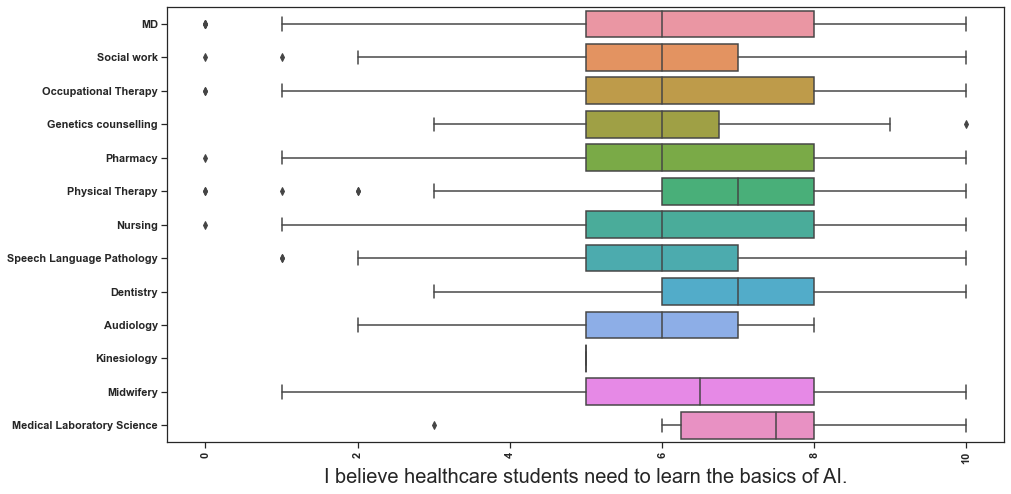

In [571]:
plt.figure(figsize=(15,8))
school_plot = sns.boxplot(x='AI_ed_Likert',y='program', data=df_val)
school_plot.set_xlabel("I believe healthcare students need to learn the basics of AI.",fontsize = 20)
school_plot.set_ylabel("")
plt.xticks(rotation=90)

plt.show()

Text(0, 0.5, 'Number')

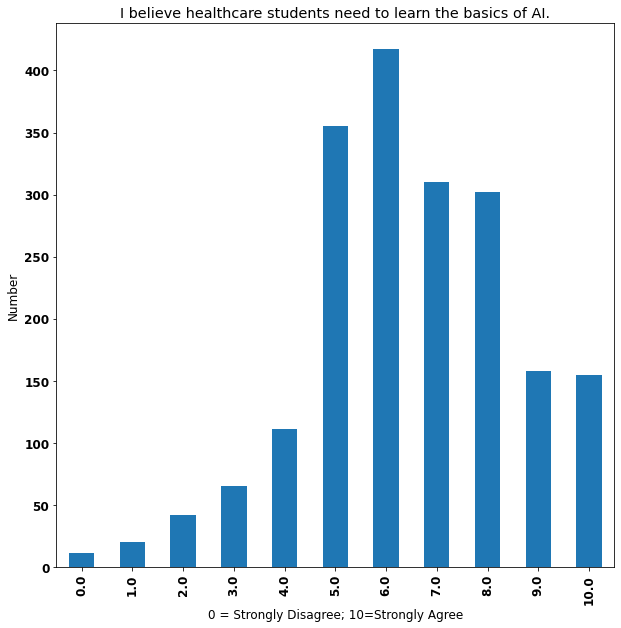

In [357]:
AI_ed_Likert_plot = pd.crosstab(index=df_val["AI_ed_Likert"],  
                      columns="count")
AI_ed_Likert_plot = AI_ed_Likert_plot.plot(kind="bar",figsize=(10,10),legend=False)
AI_ed_Likert_plot.set_title("I believe healthcare students need to learn the basics of AI.")
AI_ed_Likert_plot.set_xlabel("0 = Strongly Disagree; 10=Strongly Agree")
AI_ed_Likert_plot.set_ylabel("Number")

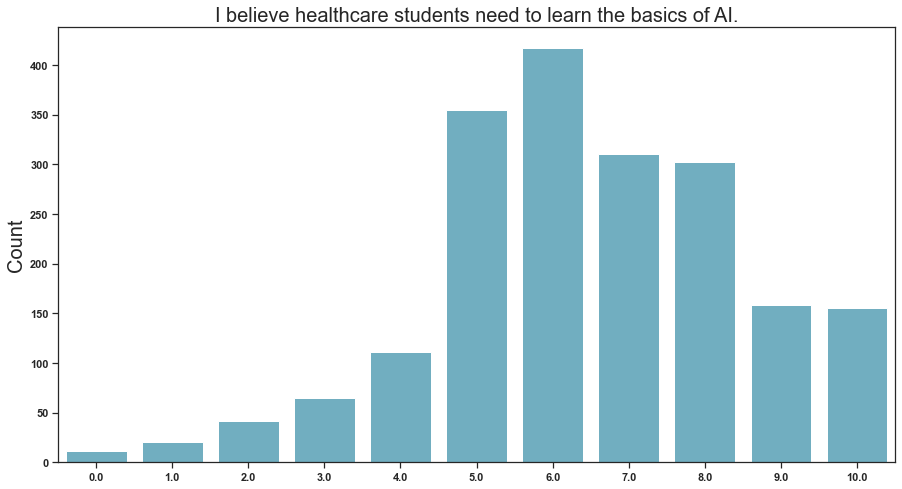

In [529]:
plt.figure(figsize=(15,8))

ax = sns.countplot(x = 'AI_ed_Likert',
              data = df_val,
              color="c",)
#plt.xticks(rotation=85)
#x1 = [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20]
#labels = ["Multiple Workshop Series","1- or 2-hour workshop",
#         "1-day course","Graduate-level training","Other",
#         "research+clinical work","research + clinical work + business"]

#plt.xticks(x1, labels, rotation=30)
#plt.xticks(rotation=30)
ax.set_title('I believe healthcare students need to learn the basics of AI.',fontsize = 20)
ax.set_ylabel('Count',fontsize = 20)
ax.set_xlabel('',fontsize = 20)
plt.show()

<AxesSubplot:ylabel='Frequency'>

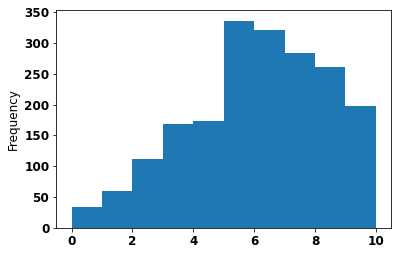

In [358]:
#Likert Scale Responses to Statement:" I understand the ethical implications of AI usage in my field."
AI_ethics_dist = df_val["AI_ethics_Likert"]
AI_ethics_dist.plot(kind="hist")

In [359]:
scipy.stats.kruskal(*[group["AI_ethics_Likert"].values for name,group in df_val.groupby("program")])


KruskalResult(statistic=107.9518791486134, pvalue=1.519561153821842e-17)

In [360]:
sp.posthoc_conover(df_val, val_col='AI_ethics_Likert', group_col='program')

,Audiology,Dentistry,Genetics counselling,Kinesiology,MD,Medical Laboratory Science,Midwifery,Nursing,Occupational Therapy,Pharmacy,Physical Therapy,Social work,Speech Language Pathology
Audiology,1.000000,9.911333e-03,0.238187,0.109801,9.025651e-01,0.685838,0.434675,3.842858e-01,0.196322,0.413995,4.006779e-03,0.979324,2.929353e-02
Dentistry,0.009911,1.000000e+00,0.077830,0.513384,3.616148e-08,0.092090,0.053131,8.586661e-05,0.004210,0.000431,7.702621e-01,0.000213,3.367769e-01
Genetics counselling,0.238187,7.782954e-02,1.000000,0.249252,5.856493e-02,0.577237,0.703686,4.387842e-01,0.905656,0.448000,2.913134e-02,0.111486,2.351915e-01
Kinesiology,0.109801,5.133842e-01,0.249252,1.000000,9.806715e-02,0.179908,0.201977,1.685249e-01,0.225810,0.167517,5.485036e-01,0.094697,3.911919e-01
MD,0.902565,3.616148e-08,0.058565,0.098067,1.000000e+00,0.676300,0.290328,1.469501e-03,0.000047,0.039360,6.599127e-17,0.809352,4.114419e-09
Medical Laboratory Science,0.685838,9.209022e-02,0.577237,0.179908,6.763000e-01,1.000000,0.800324,8.435813e-01,0.579563,0.863376,6.037150e-02,0.625477,1.913564e-01
Midwifery,0.434675,5.313074e-02,0.703686,0.201977,2.903283e-01,0.800324,1.000000,8.782504e-01,0.711610,0.860215,2.328124e-02,0.312241,1.489729e-01
Nursing,0.384286,8.586661e-05,0.438784,0.168525,1.469501e-03,0.843581,0.878250,1.000000e+00,0.144203,0.942207,1.775699e-09,0.156591,1.797232e-04
Occupational Therapy,0.196322,4.209665e-03,0.905656,0.225810,4.684718e-05,0.579563,0.711610,1.442029e-01,1.000000,0.240893,2.052120e-05,0.041673,2.024241e-02
Pharmacy,0.413995,4.313832e-04,0.448000,0.167517,3.936020e-02,0.863376,0.860215,9.422066e-01,0.240893,1.000000,1.055975e-06,0.202896,1.763080e-03


Text(0, 0.5, 'Number')

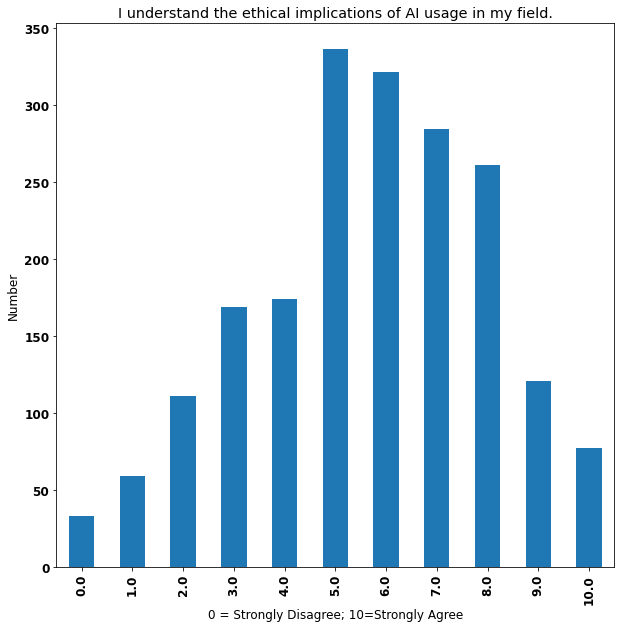

In [361]:
AI_ethics_Likert_plot = pd.crosstab(index=df_val["AI_ethics_Likert"],  
                      columns="count")
AI_ethics_Likert_plot = AI_ethics_Likert_plot.plot(kind="bar",figsize=(10,10),legend=False)
AI_ethics_Likert_plot.set_title("I understand the ethical implications of AI usage in my field.")
AI_ethics_Likert_plot.set_xlabel("0 = Strongly Disagree; 10=Strongly Agree")
AI_ethics_Likert_plot.set_ylabel("Number")

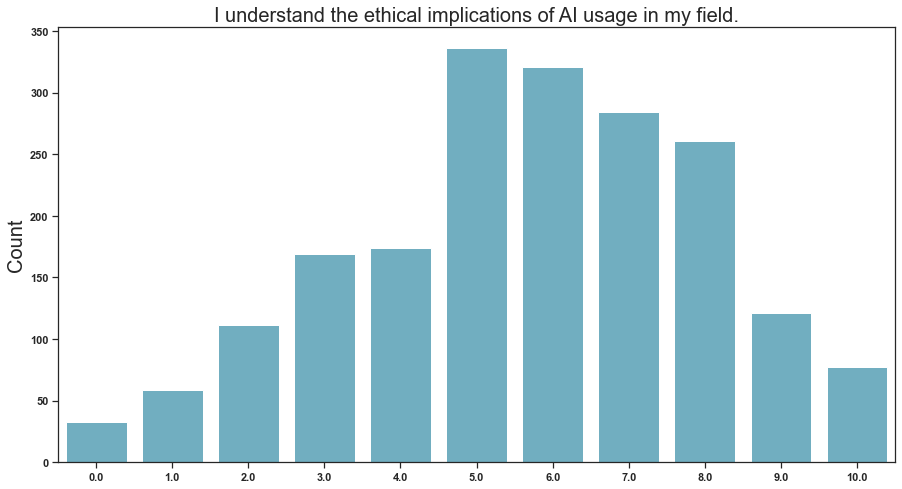

In [530]:
plt.figure(figsize=(15,8))

ax = sns.countplot(x = 'AI_ethics_Likert',
              data = df_val,
              color="c",)
#plt.xticks(rotation=85)
#x1 = [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20]
#labels = ["Multiple Workshop Series","1- or 2-hour workshop",
#         "1-day course","Graduate-level training","Other",
#         "research+clinical work","research + clinical work + business"]

#plt.xticks(x1, labels, rotation=30)
#plt.xticks(rotation=30)
ax.set_title('I understand the ethical implications of AI usage in my field.',fontsize = 20)
ax.set_ylabel('Count',fontsize = 20)
ax.set_xlabel('',fontsize = 20)
plt.show()

In [362]:
print(len(df_val.loc[df_val['AI_ethics_Likert'] <= 5]))
print(len(df_val.loc[df_val['AI_ethics_Likert'] <= 5])/len(df_val))


882
0.45323741007194246


<AxesSubplot:ylabel='Frequency'>

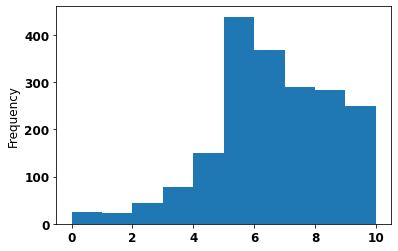

In [363]:
#Likert Scale Responses to Statement:"  I feel hopeful about having AI in my field."
AI_hope_dist = df_val["AI_hope_Likert"]
AI_hope_dist.plot(kind="hist")

In [364]:
scipy.stats.kruskal(*[group["AI_hope_Likert"].values for name,group in df_val.groupby("program")])


KruskalResult(statistic=81.31612063853768, pvalue=2.3140043288596765e-12)

In [575]:
AI_hope_Likert = sp.posthoc_conover(df_val, val_col='AI_hope_Likert', group_col='program')
AI_hope_Likert.to_csv(r'C:\Users\melxt\Desktop\AI_hope_Likert.csv')  

In [365]:
print(len(df_val.loc[df_val['AI_hope_Likert'] >= 6]))
print(len(df_val.loc[df_val['AI_hope_Likert'] >= 6])/len(df_val))


1192
0.6125385405960946


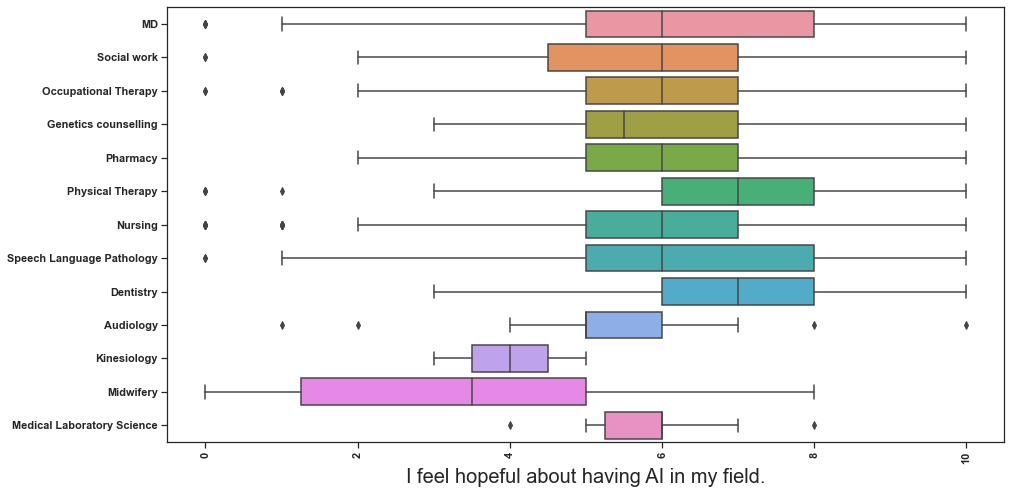

In [574]:
plt.figure(figsize=(15,8))
school_plot = sns.boxplot(x='AI_hope_Likert',y='program', data=df_val)
school_plot.set_xlabel("I feel hopeful about having AI in my field.",fontsize = 20)
school_plot.set_ylabel("")
plt.xticks(rotation=90)

plt.show()

Text(0, 0.5, 'Number')

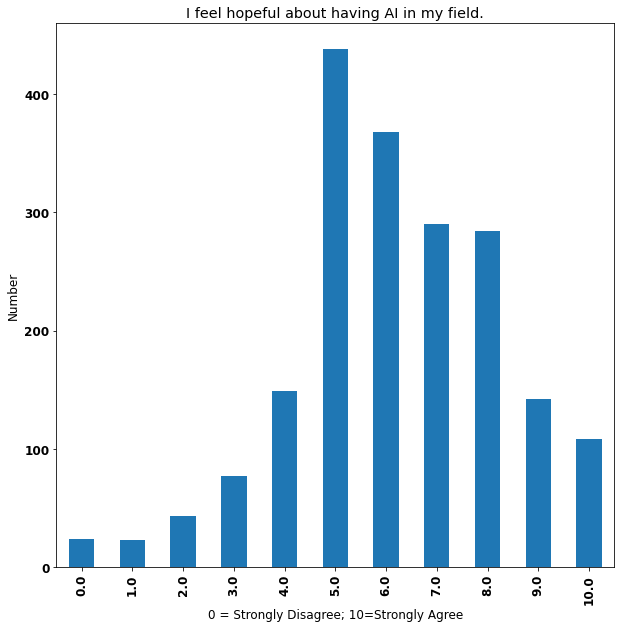

In [366]:
AI_hope_Likert_plot = pd.crosstab(index=df_val["AI_hope_Likert"],  
                      columns="count")
AI_hope_Likert_plot = AI_hope_Likert_plot.plot(kind="bar",figsize=(10,10),legend=False)
AI_hope_Likert_plot.set_title("I feel hopeful about having AI in my field.")
AI_hope_Likert_plot.set_xlabel("0 = Strongly Disagree; 10=Strongly Agree")
AI_hope_Likert_plot.set_ylabel("Number")


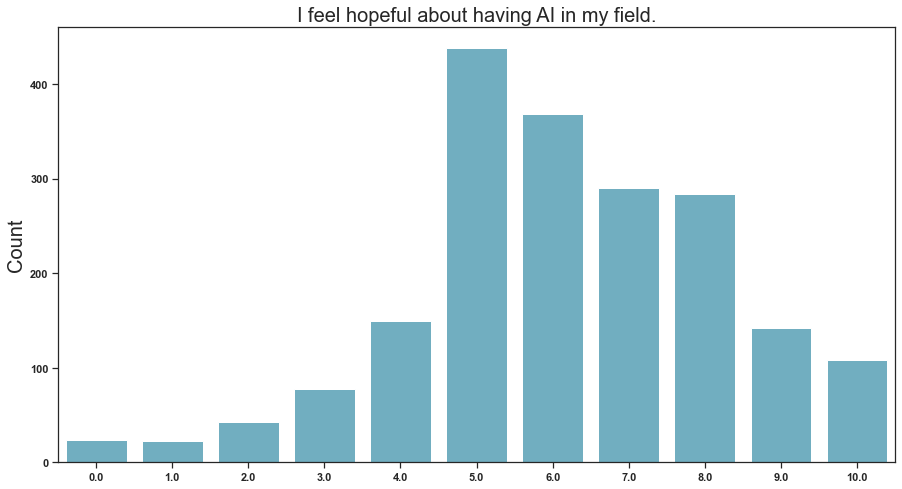

In [531]:
plt.figure(figsize=(15,8))

ax = sns.countplot(x = 'AI_hope_Likert',
              data = df_val,
              color="c",)
#plt.xticks(rotation=85)
#x1 = [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20]
#labels = ["Multiple Workshop Series","1- or 2-hour workshop",
#         "1-day course","Graduate-level training","Other",
#         "research+clinical work","research + clinical work + business"]

#plt.xticks(x1, labels, rotation=30)
#plt.xticks(rotation=30)
ax.set_title('I feel hopeful about having AI in my field.',fontsize = 20)
ax.set_ylabel('Count',fontsize = 20)
ax.set_xlabel('',fontsize = 20)
plt.show()

In [367]:
sp.posthoc_conover(df_val, val_col='AI_hope_Likert', group_col='program')

,Audiology,Dentistry,Genetics counselling,Kinesiology,MD,Medical Laboratory Science,Midwifery,Nursing,Occupational Therapy,Pharmacy,Physical Therapy,Social work,Speech Language Pathology
Audiology,1.000000,2.741526e-03,0.391232,0.353821,3.639937e-02,0.443842,8.957483e-02,1.811360e-01,0.092265,0.232345,1.414102e-03,0.472658,3.231307e-02
Dentistry,0.002742,1.000000e+00,0.005018,0.030547,1.586702e-02,0.109521,7.179798e-09,9.636000e-05,0.002984,0.000279,9.554983e-01,0.001519,6.623390e-02
Genetics counselling,0.391232,5.017755e-03,1.000000,0.185382,1.104364e-01,0.896397,2.318907e-03,6.321106e-01,0.319465,0.760780,1.577919e-03,0.839312,9.847899e-02
Kinesiology,0.353821,3.054694e-02,0.185382,1.000000,7.881594e-02,0.192065,8.609256e-01,1.389411e-01,0.106562,0.151313,2.838434e-02,0.206401,7.228170e-02
MD,0.036399,1.586702e-02,0.110436,0.078816,1.000000e+00,0.461718,3.008619e-07,1.440431e-03,0.195064,0.014974,3.749494e-04,0.046568,7.098492e-01
Medical Laboratory Science,0.443842,1.095212e-01,0.896397,0.192065,4.617180e-01,1.000000,2.093450e-02,9.049319e-01,0.674366,0.972999,9.166158e-02,0.789948,4.098144e-01
Midwifery,0.089575,7.179798e-09,0.002319,0.860926,3.008619e-07,0.020935,1.000000e+00,2.598716e-05,0.000005,0.000097,3.651915e-10,0.003201,5.909108e-07
Nursing,0.181136,9.636000e-05,0.632111,0.138941,1.440431e-03,0.904932,2.598716e-05,1.000000e+00,0.218952,0.773504,2.032579e-08,0.426162,1.723064e-02
Occupational Therapy,0.092265,2.984239e-03,0.319465,0.106562,1.950643e-01,0.674366,5.293711e-06,2.189516e-01,1.000000,0.233463,4.679447e-05,0.182841,2.103543e-01
Pharmacy,0.232345,2.791732e-04,0.760780,0.151313,1.497438e-02,0.972999,9.714941e-05,7.735037e-01,0.233463,1.000000,2.242194e-06,0.557880,2.931384e-02


In [368]:
df_val["AI_hope_Likert"].median()

6.0

<AxesSubplot:ylabel='Frequency'>

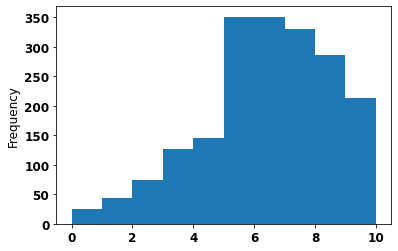

In [369]:
#Likert Scale Responses to Statement:"I am worried about the role AI will play in my field."
AI_worry_dist = df_val["AI_worry_Likert"]
AI_worry_dist.plot(kind="hist")

In [370]:
scipy.stats.kruskal(*[group["AI_worry_Likert"].values for name,group in df_val.groupby("program")])


KruskalResult(statistic=63.87770727453068, pvalue=4.392739504915778e-09)

In [577]:
AI_worry_Likert = sp.posthoc_conover(df_val, val_col='AI_worry_Likert', group_col='program')
AI_worry_Likert.to_csv(r'C:\Users\melxt\Desktop\AI_worry_Likert.csv')  

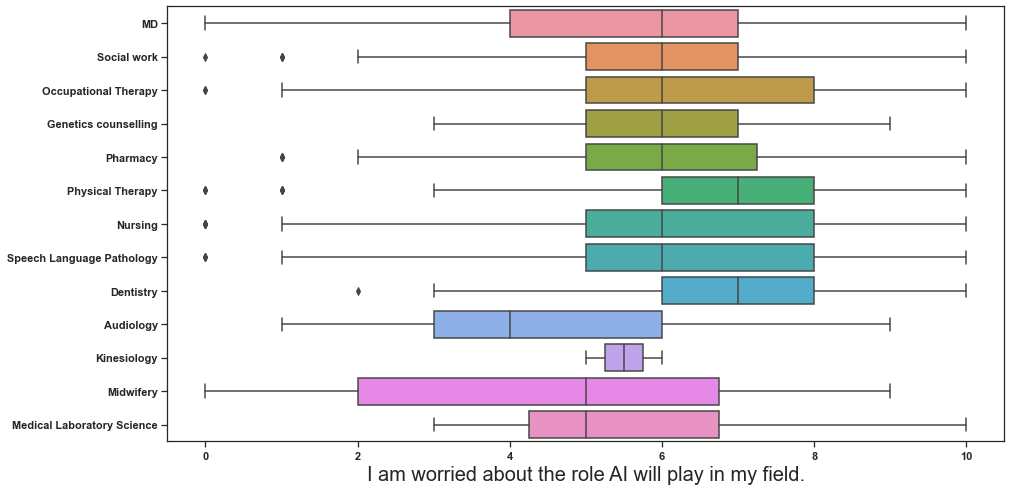

In [578]:
plt.figure(figsize=(15,8))
school_plot = sns.boxplot(x='AI_worry_Likert',y='program', data=df_val)
school_plot.set_xlabel("I am worried about the role AI will play in my field.",fontsize = 20)
school_plot.set_ylabel("")
#plt.xticks(rotation=90)

plt.show()

In [372]:
df_val["AI_worry_Likert"].median()

6.0

In [373]:
print(len(df_val.loc[df_val['AI_worry_Likert'] >= 6]))
print(len(df_val.loc[df_val['AI_worry_Likert'] >= 6])/len(df_val))


1181
0.6068859198355602


Text(0, 0.5, 'Number')

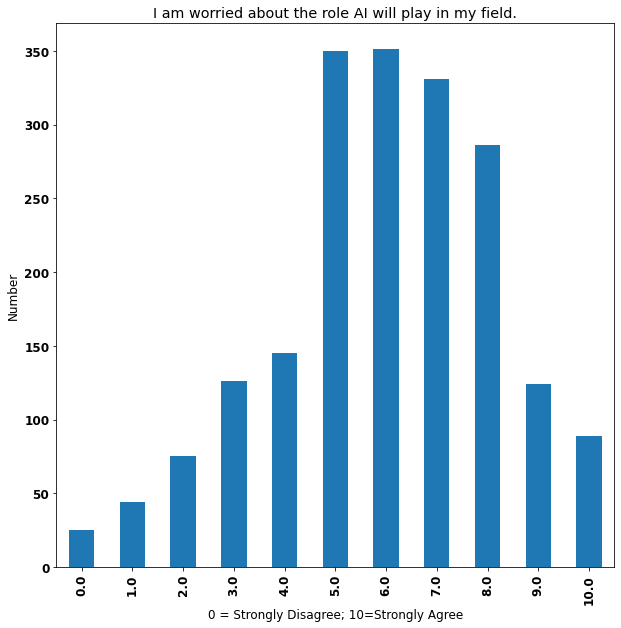

In [374]:
AI_worry_Likert_plot = pd.crosstab(index=df_val["AI_worry_Likert"],  
                      columns="count")
AI_worry_Likert_plot = AI_worry_Likert_plot.plot(kind="bar",figsize=(10,10),legend=False)
AI_worry_Likert_plot.set_title("I am worried about the role AI will play in my field.")
AI_worry_Likert_plot.set_xlabel("0 = Strongly Disagree; 10=Strongly Agree")
AI_worry_Likert_plot.set_ylabel("Number")

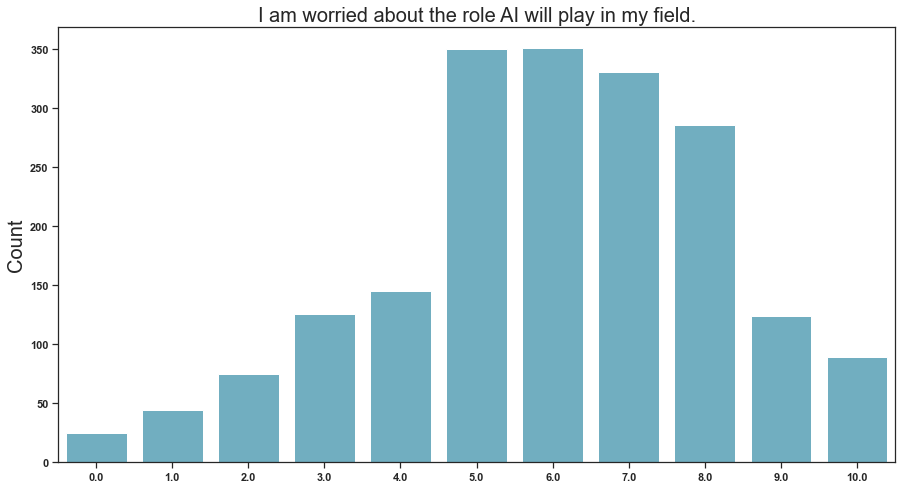

In [532]:
plt.figure(figsize=(15,8))

ax = sns.countplot(x = 'AI_worry_Likert',
              data = df_val,
              color="c",)
#plt.xticks(rotation=85)
#x1 = [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20]
#labels = ["Multiple Workshop Series","1- or 2-hour workshop",
#         "1-day course","Graduate-level training","Other",
#         "research+clinical work","research + clinical work + business"]

#plt.xticks(x1, labels, rotation=30)
#plt.xticks(rotation=30)
ax.set_title('I am worried about the role AI will play in my field.',fontsize = 20)
ax.set_ylabel('Count',fontsize = 20)
ax.set_xlabel('',fontsize = 20)
plt.show()

<AxesSubplot:ylabel='Frequency'>

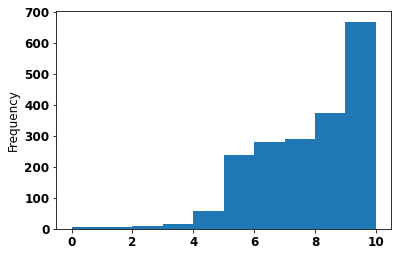

In [375]:
#Likert Scale Responses to Statement:" I believe AI is a technology that requires careful management."
AI_mgmt_dist = df_val["AI_mgmt_Likert"]
AI_mgmt_dist.plot(kind="hist")


In [376]:
scipy.stats.kruskal(*[group["AI_mgmt_Likert"].values for name,group in df_val.groupby("program")])


KruskalResult(statistic=106.7078982621723, pvalue=2.6740670121195792e-17)

In [377]:
sp.posthoc_conover(df_val, val_col='AI_mgmt_Likert', group_col='program')

,Audiology,Dentistry,Genetics counselling,Kinesiology,MD,Medical Laboratory Science,Midwifery,Nursing,Occupational Therapy,Pharmacy,Physical Therapy,Social work,Speech Language Pathology
Audiology,1.000000,0.355171,0.143422,0.224014,4.801046e-01,0.024287,0.100389,2.191305e-01,5.595553e-01,0.407800,5.873203e-01,0.808996,2.325995e-01
Dentistry,0.355171,1.000000,0.364020,0.100377,4.356303e-04,0.000478,0.000904,5.802025e-06,4.286306e-01,0.000834,4.153502e-01,0.092771,6.779120e-01
Genetics counselling,0.143422,0.364020,1.000000,0.059992,3.019101e-04,0.000138,0.000249,1.302351e-05,1.036063e-01,0.000372,1.033353e-01,0.024768,5.016585e-01
Kinesiology,0.224014,0.100377,0.059992,1.000000,3.021977e-01,0.995142,0.621017,4.025953e-01,1.316530e-01,0.331645,1.356367e-01,0.245550,8.174934e-02
MD,0.480105,0.000436,0.000302,0.302198,1.000000e+00,0.021153,0.092207,2.546870e-02,9.250463e-06,0.665601,1.854850e-04,0.501218,9.283786e-08
Medical Laboratory Science,0.024287,0.000478,0.000138,0.995142,2.115316e-02,1.000000,0.332197,6.147068e-02,8.760693e-04,0.033291,1.077104e-03,0.016980,1.489413e-04
Midwifery,0.100389,0.000904,0.000249,0.621017,9.220676e-02,0.332197,1.000000,2.959338e-01,1.558209e-03,0.153756,2.184252e-03,0.073809,1.439789e-04
Nursing,0.219130,0.000006,0.000013,0.402595,2.546870e-02,0.061471,0.295934,1.000000e+00,1.986732e-09,0.298069,2.693181e-07,0.135287,3.749071e-11
Occupational Therapy,0.559555,0.428631,0.103606,0.131653,9.250463e-06,0.000876,0.001558,1.986732e-09,1.000000e+00,0.000288,9.304291e-01,0.185302,1.143564e-01
Pharmacy,0.407800,0.000834,0.000372,0.331645,6.656015e-01,0.033291,0.153756,2.980693e-01,2.877949e-04,1.000000,1.110490e-03,0.401938,4.020819e-06


In [378]:
df_val["AI_mgmt_Likert"].median()

8.0

Text(0, 0.5, 'Number')

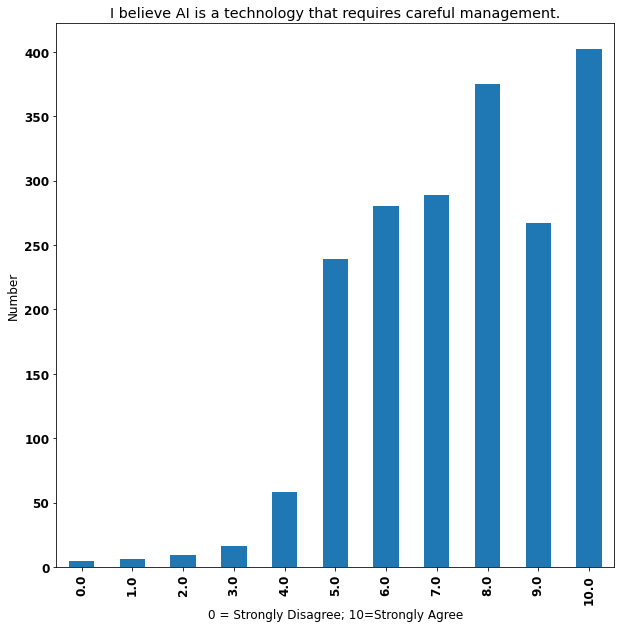

In [379]:
AI_mgmt_Likert_plot = pd.crosstab(index=df_val["AI_mgmt_Likert"],  
                      columns="count")
AI_mgmt_Likert_plot = AI_mgmt_Likert_plot.plot(kind="bar",figsize=(10,10),legend=False)
AI_mgmt_Likert_plot.set_title("I believe AI is a technology that requires careful management.")
AI_mgmt_Likert_plot.set_xlabel("0 = Strongly Disagree; 10=Strongly Agree")
AI_mgmt_Likert_plot.set_ylabel("Number")

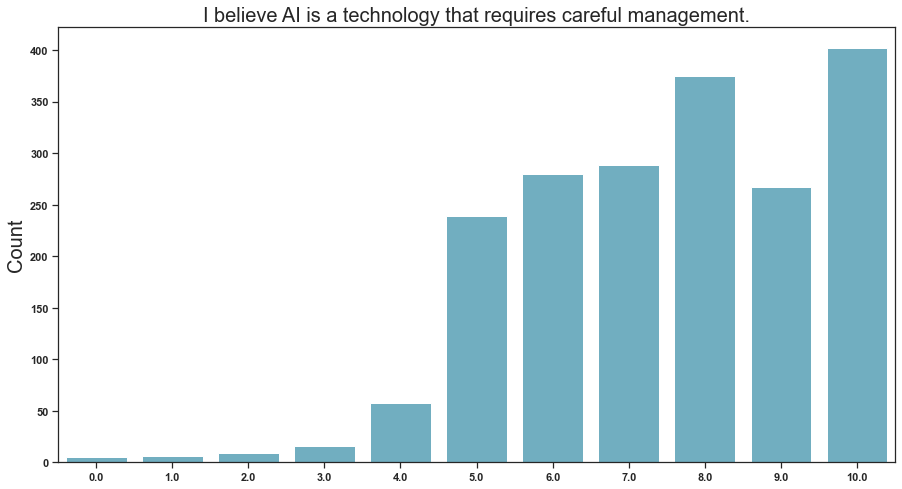

In [533]:
plt.figure(figsize=(15,8))

ax = sns.countplot(x = 'AI_mgmt_Likert',
              data = df_val,
              color="c",)
#plt.xticks(rotation=85)
#x1 = [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20]
#labels = ["Multiple Workshop Series","1- or 2-hour workshop",
#         "1-day course","Graduate-level training","Other",
#         "research+clinical work","research + clinical work + business"]

#plt.xticks(x1, labels, rotation=30)
#plt.xticks(rotation=30)
ax.set_title('I believe AI is a technology that requires careful management.',fontsize = 20)
ax.set_ylabel('Count',fontsize = 20)
ax.set_xlabel('',fontsize = 20)
plt.show()

In [380]:
print(len(df_val.loc[df_val['AI_mgmt_Likert'] >=6]))
print(len(df_val.loc[df_val['AI_mgmt_Likert'] >=6])/len(df_val))


1613
0.828879753340185


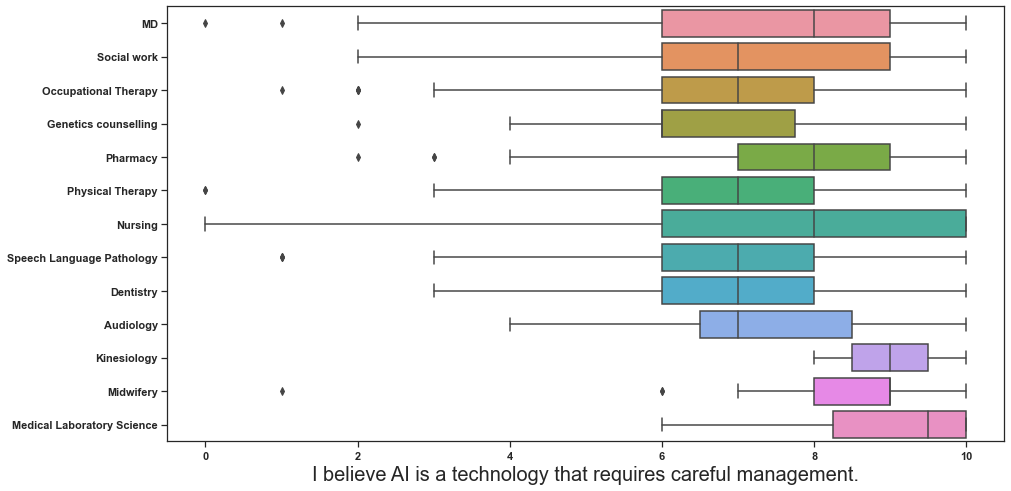

In [579]:
plt.figure(figsize=(15,8))
school_plot = sns.boxplot(x='AI_mgmt_Likert',y='program', data=df_val)
school_plot.set_xlabel("I believe AI is a technology that requires careful management.",fontsize = 20)
school_plot.set_ylabel("")
#plt.xticks(rotation=90)

plt.show()

# Which objectives related to AI basics are students interested to learn about?


In [381]:
#participants ranked top 3 objectives with order of importance from 1-3
#i recoded the responses in excel where 1->3, 2->2, 3->1 to reflect weights 
#summed the weighted ranks 

In [382]:
df_num

,StartDate,EndDate,Status,IPAddress,Progress,Duration (in seconds),Finished,RecordedDate,ResponseId,RecipientLastName,...,Q16 - Topic Sentiment Label,Q16 - Topic Sentiment Score,Q16 - Topics,Q10 - Parent Topics,Q10 - Sentiment Polarity,Q10 - Sentiment Score,Q10 - Sentiment,Q10 - Topic Sentiment Label,Q10 - Topic Sentiment Score,Q10 - Topics
0,2/3/2021 22:33,2/3/2021 22:41,0.0,108.172.172.20,100.0,474.0,1.0,2/3/2021 22:41,R_1o5qLS0XTJQYuX1,NaN,...,NaN,NaN,Unknown,NaN,NaN,-1.0,Negative,NaN,NaN,Unknown
1,2/3/2021 23:17,2/3/2021 23:21,0.0,173.183.116.93,100.0,208.0,1.0,2/3/2021 23:21,R_21ys9XG9SEB5Xgy,NaN,...,NaN,NaN,Unknown,NaN,NaN,1.0,Positive,NaN,NaN,Unknown
2,2/3/2021 23:19,2/3/2021 23:25,0.0,50.98.67.95,100.0,371.0,1.0,2/3/2021 23:25,R_2WuL3WwT9y5mNFY,NaN,...,NaN,NaN,Unknown,NaN,NaN,1.0,Positive,NaN,NaN,Unknown
3,2/3/2021 23:24,2/3/2021 23:27,0.0,72.143.238.237,100.0,167.0,1.0,2/3/2021 23:27,R_wNJB2iJvmaiYGw9,NaN,...,NaN,NaN,Unknown,NaN,NaN,0.0,Mixed,NaN,NaN,Unknown
4,2/3/2021 23:18,2/3/2021 23:27,0.0,23.16.28.67,100.0,538.0,1.0,2/3/2021 23:27,R_1i4pHVQrPnwYE1r,NaN,...,NaN,NaN,Unknown,NaN,NaN,0.0,Mixed,NaN,NaN,Unknown
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2080,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2081,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2082,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2083,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Obj1=identify when technology is appropriate for a given clinical context   
Obj2=understand and interpret AI-generated results  
Obj3=Be able to communicate how the technology works in a way that others can understand  
Obj4=Identify the ethical implications of using AI in clinical contexts  
Obj5=Understand how the underlying technological processes work  
Obj6=Learn the terminologies in order to communicate and collaborate with engineers/developers  
Obj8=Identify wasy AI can improve healthcare quality improvement  
Obj7=Other

In [383]:
print("# of participants who ranked 1 as first objective:",len(df_val.loc[df_val['Q11_0_1_RANK'] == 1]))
print("# of participants who ranked 2 as first objective:",len(df_val.loc[df_val['Q11_0_2_RANK'] == 1]))
print("# of participants who ranked 3 as first objective:",len(df_val.loc[df_val['Q11_0_3_RANK'] == 1]))
print("# of participants who ranked 4 as first objective:",len(df_val.loc[df_val['Q11_0_4_RANK'] == 1]))
print("# of participants who ranked 5 as first objective:",len(df_val.loc[df_val['Q11_0_5_RANK'] == 1]))
print("# of participants who ranked 6 as first objective:",len(df_val.loc[df_val['Q11_0_6_RANK'] == 1]))
print("# of participants who ranked 7 as first objective:",len(df_val.loc[df_val['Q11_0_7_RANK'] == 1]))
print("# of participants who ranked 8 as first objective:",len(df_val.loc[df_val['Q11_0_8_RANK'] == 1]))




# of participants who ranked 1 as first objective: 562
# of participants who ranked 2 as first objective: 333
# of participants who ranked 3 as first objective: 257
# of participants who ranked 4 as first objective: 309
# of participants who ranked 5 as first objective: 92
# of participants who ranked 6 as first objective: 122
# of participants who ranked 7 as first objective: 3
# of participants who ranked 8 as first objective: 268


In [384]:
obj_plot = pd.crosstab(index=df_num["Q11_0_GROUP"],  
                      columns="count")
obj_plot
#obj_plot = obj_plot.sort_values("count")
#obj_plot = obj_plot.plot(kind="bar",figsize=(10,10),legend=False)
#curric_plot.set_title("")

col_0,count
Q11_0_GROUP,
1,51
"1,2",1
"1,2,3",15
"1,2,4",19
"1,2,5",9
...,...
"8,6,1",3
"8,6,2",1
"8,6,3",3


In [385]:
#(df_val.loc[df_val['Q11_0_1_RANK']==1])
test= df_val['Q11_0_1_RANK']==1
test = test.to_numpy()
type(test)
test

array([False,  True, False, ..., False,  True, False])

# How soon will AI impact careers?

In [386]:
timeline = df_val["AI_impact_time"]
timeline.loc[:].value_counts()

in 10 years           790
in 5 years            761
in 20 years           291
in 50 years            80
not in my lifetime     24
Name: AI_impact_time, dtype: int64

In [387]:
print(len(df_val.loc[df_val['AI_impact_time'] == "in 10 years"])/len(df_val))
print(len(df_val.loc[df_val['AI_impact_time'] == "in 5 years"])/len(df_val))
(len(df_val.loc[df_val['AI_impact_time'] == "in 10 years"])+len(df_val.loc[df_val['AI_impact_time'] == "in 5 years"]))/len(df_val)
print(len(df_val.loc[df_val['AI_impact_time'] == "in 20 years"])/len(df_val))
len(df_val.loc[df_val['AI_impact_time'] == "in 20 years"])
print(len(df_val.loc[df_val['AI_impact_time'] == "in 50 years"])/len(df_val)*100)
print(len(df_val.loc[df_val['AI_impact_time'] == "not in my lifetime"])/len(df_val)*100)
print(len(df_val.loc[df_val['AI_impact_time'] == "not in my lifetime"]))

0.40596094552929085
0.3910585817060637
0.14953751284686537
4.110996916752312
1.2332990750256936
24


In [388]:
len(df_val.loc[df_val['AI_impact_time'] == "in 10 years"])+len(df_val.loc[df_val['AI_impact_time'] == "in 5 years"])

1551

Text(0.5, 1.0, ' ')

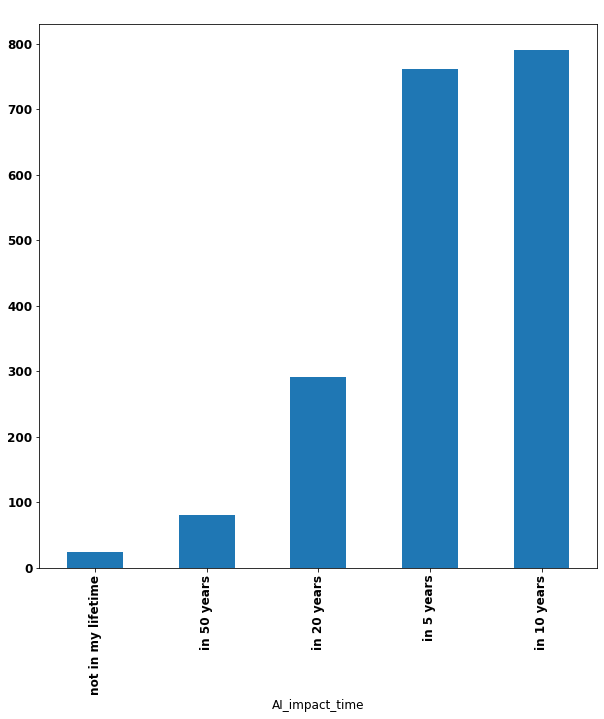

In [389]:
timeline_plot = pd.crosstab(index=df_val["AI_impact_time"],  
                      columns="count")
timeline_plot = timeline_plot.sort_values("count")
timeline_plot = timeline_plot.plot(kind="bar",figsize=(10,10),legend=False)
timeline_plot.set_title(" ")



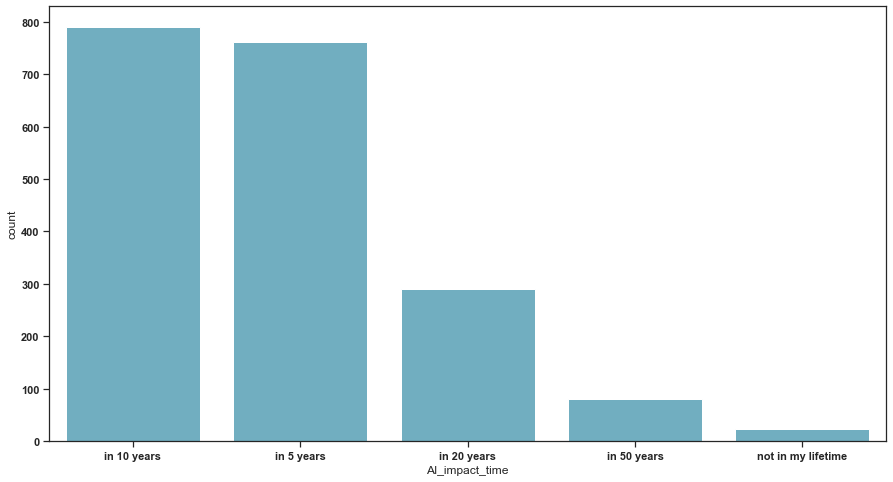

In [512]:
plt.figure(figsize=(15,8))

sns.countplot(x = 'AI_impact_time',
              data = df_val,
              color="c",
              order = df_val['AI_impact_time'].value_counts().index)
#plt.xticks(rotation=85)

plt.show()

# Should learning AI basics be part of the curriculum or extracurricular?

In [390]:
curric = df_val["AI_curric"]
curric.loc[:].value_counts()

Should be part of my program/curriculum    1216
Should be outside of curriculum time        653
Other                                        77
Name: AI_curric, dtype: int64

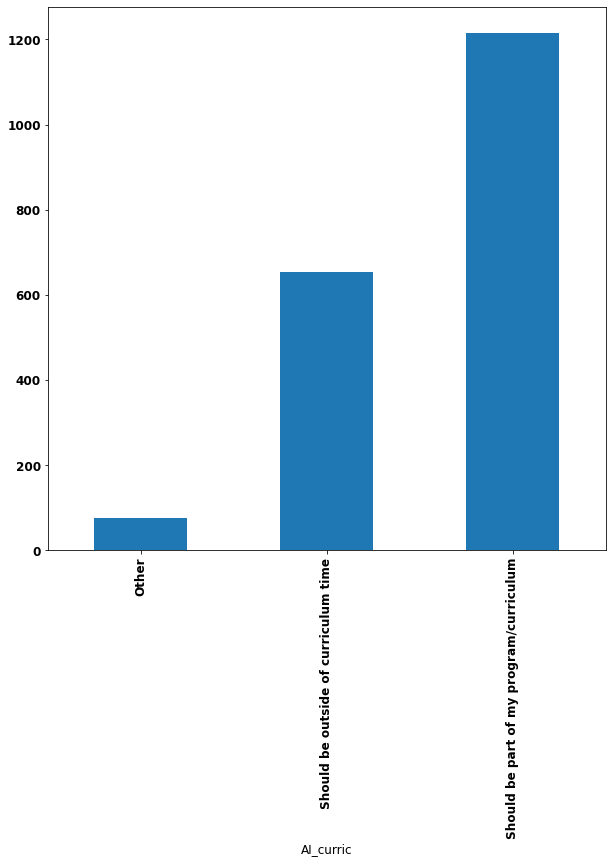

In [391]:
curric_plot = pd.crosstab(index=df_val["AI_curric"],  
                      columns="count")
curric_plot = curric_plot.sort_values("count")
curric_plot = curric_plot.plot(kind="bar",figsize=(10,10),legend=False)
#curric_plot.set_title("")


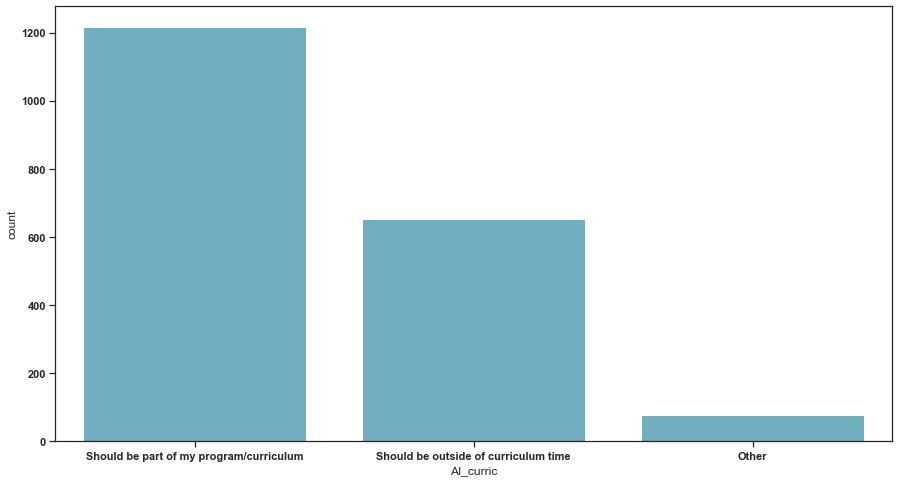

In [513]:
plt.figure(figsize=(15,8))

sns.countplot(x = 'AI_curric',
              data = df_val,
              color="c",
              order = df_val['AI_curric'].value_counts().index)
#plt.xticks(rotation=85)

plt.show()

In [392]:
support = df_val.loc[df_val['AI_percep'] >=6]
print(len(support))
print(len(support)/len(df_val))
print(len(support.loc[support['AI_curric'] == "Should be outside of curriculum time"]))
print(len(support.loc[support['AI_curric'] == "Should be part of my program/curriculum"]))


1407
0.7230215827338129
423
925


In [393]:
print(len(df_val.loc[df_val['AI_curric'] == "Should be part of my program/curriculum"]))
print(len(df_val.loc[df_val['AI_curric'] == "Should be part of my program/curriculum"])/len(df_val))


print(len(df_val.loc[df_val['AI_curric'] == "Should be outside of curriculum time"]))
print(len(df_val.loc[df_val['AI_curric'] == "Should be outside of curriculum time"])/len(df_val))


print(len(df_val.loc[df_val['AI_curric'] == "Other"]))
print(len(df_val.loc[df_val['AI_curric'] == "Other"])/len(df_val))


1216
0.6248715313463515
653
0.3355601233299075
77
0.039568345323741004


# How should AI basics be delivered to students (if any)?

In [394]:
AI_ed_form = df_val["AI_ed_form"]
AI_ed_form.loc[:].value_counts()

Multiple workshop series                                                                                      541
1- or 2-hour workshop                                                                                         478
1-day course                                                                                                  314
Graduate-level education (Master's, PhD)                                                                      147
1-day course,Multiple workshop series,1- or 2-hour workshop                                                   109
Multiple workshop series,1- or 2-hour workshop                                                                 94
1-day course,1- or 2-hour workshop                                                                             92
1-day course,Multiple workshop series                                                                          39
1-day course,Multiple workshop series,1- or 2-hour workshop,Graduate-level education (Ma

In [395]:
print(len(df_val.loc[df_val['AI_ed_form'] == "Multiple workshop series"]))
print(len(df_val.loc[df_val['AI_ed_form'] == "Multiple workshop series"])/len(df_val)*100)

print(len(df_val.loc[df_val['AI_ed_form'] == "1- or 2-hour workshop"]))
print(len(df_val.loc[df_val['AI_ed_form'] == "1- or 2-hour workshop"])/len(df_val)*100)

print(len(df_val.loc[df_val['AI_ed_form'] == "1-day course"]))
print(len(df_val.loc[df_val['AI_ed_form'] == "1-day course"])/len(df_val)*100)

239/len(df_val)*100

541
27.800616649537513
478
24.563206577595068
314
16.135662898252825


12.281603288797534

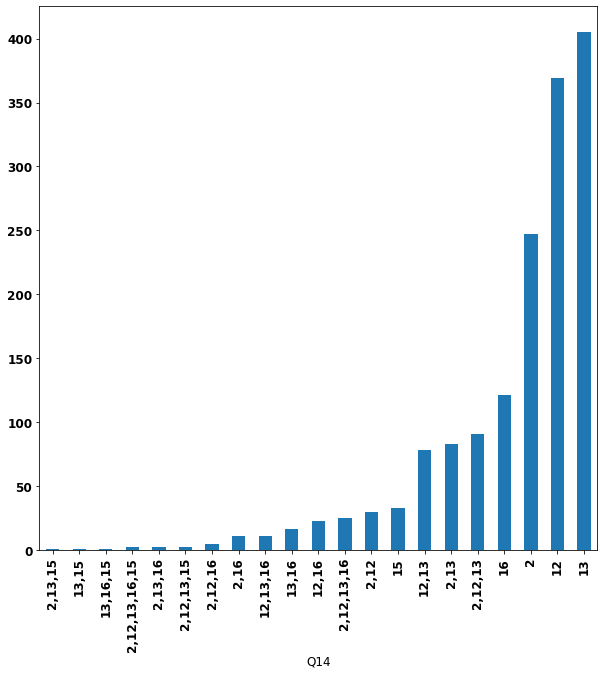

In [396]:
edform_plot = pd.crosstab(index=df_num["Q14"],  
                      columns="count")
edform_plot = edform_plot.sort_values("count")
edform_plot = edform_plot.plot(kind="bar",figsize=(10,10),legend=False)
#curric_plot.set_title("")


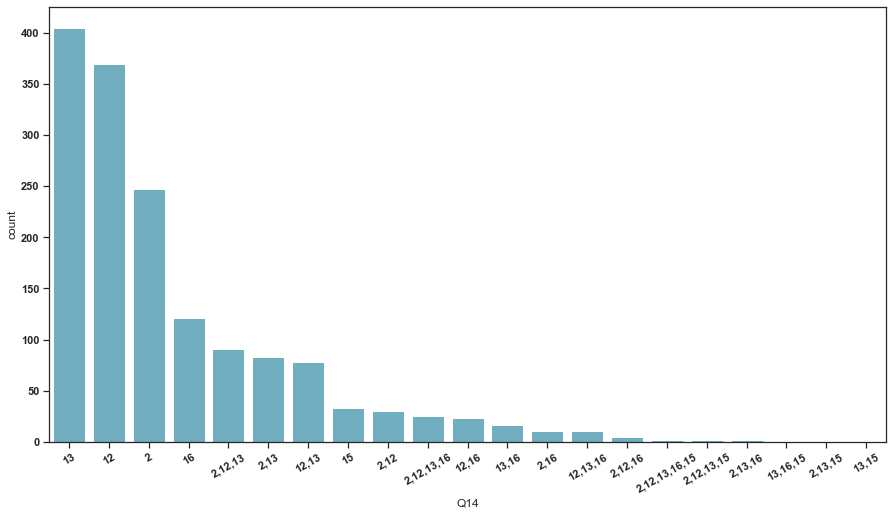

In [519]:
plt.figure(figsize=(15,8))

sns.countplot(x = 'Q14',
              data = df_num,
              color="c",
              order = df_num['Q14'].value_counts().index)
#plt.xticks(rotation=85)
#x1 = [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20]
#labels = ["Multiple Workshop Series","1- or 2-hour workshop",
#         "1-day course","Graduate-level training","Other",
#         "research+clinical work","research + clinical work + business"]

#plt.xticks(x1, labels, rotation=30)
plt.xticks(rotation=30)

plt.show()